# Lending Club Default Case Study - Exploratory Data Analysis

## Business Understanding

You work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. **Two types of risks** are associated with the bank’s decision:If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company - 
* If the applicant is **likely to repay the loan**, then not approving the loan results in a *loss of business* to the company
* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company


When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

 1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
    - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted on the loan** 
 2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed causing huge loss to the lenders.

Objective is to **identify the risky loan applicants** at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

To **identify patterns and driving factors (or driver variables) behind loan default which indicate if a person is likely to default**, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


##### We are provided with the **data for loans issued from 2007 to 2011** and **data dictionary** describing the variables

## The Exploratory Data Analysis is divided into **4 sections** - 
1. Data Sourcing and Understanding
2. Data Cleanzing - removal of redundant columns , imputing missing values etc.
3. Analysis of Dataset
4. Observations and Recommendations

### Data Sourcing and Understanding

In [3]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Filter out the warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

#### Reading and Understanding Data

In [4]:
# Read CSV file and check it's attributes before proceeding further.

loan = pd.read_csv('loan.csv')
# Check the first 5 rows of dataset
loan.head(5)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
# check shape 
loan.shape

(39717, 111)

In [6]:
# Check Column datatype of loan data
loan.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

##### Datatypes for the columns look fine 

In [7]:
# Check distribution of allthe column data
loan.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  ...  \
count     39717.00    39717.00 39717.00     39717.00        39717.00  ...   
mean        324.56    68968.93    13.32         0.15            0.87  ...   
std         208.87    63793.77     6.68         0.49            1.07  ...   
min          15.69     4000.00     0.00         0.00            0.00  ...   
25%         167.02    40404.00     8.17         0.00            0.00  ...   
50%         280.22    59000.00    13.40         0.00            1.00  ...   
75%         430.78    82300.00    18.60         0.00            1.00  ...   
max        1305.19  6000000.00    29.99        11.00            8.00  ...   

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count                0.00                0.00            0.00   
mean                  NaN                 NaN             NaN   
std                   NaN                 NaN             NaN   
min                   NaN                 NaN             NaN   
25%                   NaN                 NaN             NaN   
50%                   NaN                 NaN             NaN   
75%                   NaN                 NaN             NaN   
max                   NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
count              0.00              39020.00   39678.00             0.00   
mean                NaN                  0.04       0.00              NaN   
std                 NaN                  0.20       0.00              NaN   
min                 NaN                  0.00       0.00              NaN   
25%                 NaN                  0.00       0.00              NaN   
50%                 NaN                  0.00       0.00              NaN   
75%                 NaN                  0.00       0.00              NaN   
max                 NaN                  2.00       0.00              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count               0.00            0.00                        0.00  
mean                 NaN             NaN                         NaN  
std                  NaN             NaN                         NaN  
min                  NaN             NaN                         NaN  
25%                  NaN             NaN                         NaN  
50%                  NaN             NaN                         NaN  
75%                  NaN             NaN                         NaN  
max                  NaN             NaN                         NaN  

[8 rows x 87 columns]

In [8]:
# Check all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

##### Our goal is to compare various variables in the dataset and analyse and figure out which ones influence or affect the loan status column

#### Some observations on data - 
- There are many columns which are only relevant post loan is approved and provided so those columns will not be useful for our case study analysis to determine the drivers for default and can be dropped.
- Columns cleanup with respect to signs etc will be needed and some columns like int_rate will be needed to convert to float, same goes for date columns as well.

### Data Cleanzing

#### Data checking and Missing Values

In [9]:


# check how many rows have all missing values
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# check how many columns have all missing values
print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have missing values.



Number of empty Rows:
0
Number of empty Columns:
54


In [10]:
# Calculate null percentage for each column
null_percentage = (loan.isnull().sum() / len(loan)) * 100

# Get columns with null percentage greater than 70%
columns_to_drop_null = null_percentage[null_percentage > 70].index

# Drop columns from DataFrame
loan = loan.drop(columns=columns_to_drop_null)

# Calculate null percentage for each column
null_percentage = (loan.isna().sum() / len(loan)) * 100

# Get columns with null percentage greater than 50%
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop columns from DataFrame
loan = loan.drop(columns=columns_to_drop)

In [11]:
print(columns_to_drop_null)
print(columns_to_drop)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

##### We can see many columns with 100 % null values , we can drop them since they will not be useful for our analysis

In [12]:
loan.shape

(39717, 54)

In [13]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### We can see that **64% of mths_since_last_delinq column has null values and 32% desc is null**. 
##### The **desc column** is pure description and unique values per id and verbose in nature which might help with some text based analysis but that is not the focus of this case study so **we can drop it** can it cannot be imputed and The **emp_title** column has **6% null values** but cannot be imputed so will retain it as it is.
##### The **emp_length** column **2% null values** but **can be a driver for loan_status** so will retain it and **can be imputed with median/mode**.

In [14]:
# Dropping the post_loan_approval_varaibles from loan since these wont be helpful to determine the initial inputs that help with the loan approval decision
title_columns = ['title','desc','emp_title','zip_code']

# Filter out columns that exist in DataFrame
columns_to_drop_existing = [col for col in title_columns if col in loan.columns]

# Drop identified columns
loan.drop(columns=columns_to_drop_existing, inplace=True)

In [15]:
loan.shape

(39717, 50)

##### Catagorizing the columns into pre_loan_approval_variables and post_loan_approval_variables using the data dictionary to know the loan terminoligies

In [16]:

pre_loan_approval_variables = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
    'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
    'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'initial_list_status','collections_12_mths_ex_med', 'policy_code', 'application_type', 
    'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

post_loan_approval_variables = ['delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec','revol_bal',
    'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 
    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

In [17]:
# Dropping the post_loan_approval_varaibles from loan since these wont be helpful to determine the initial inputs that help with the loan approval decision
loan.drop(post_loan_approval_variables, axis =1, inplace= True)
loan.shape

(39717, 30)

In [18]:
unique_columns = []
for col in loan.columns:
    if loan[col].nunique() == len(loan):
        unique_columns.append(col)
loan.drop(columns=unique_columns, inplace=True)
unique_columns

['id', 'member_id', 'url']

In [19]:
loan.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [20]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000          4975.00   36 months   10.65%       162.87   
1       2500         2500          2500.00   60 months   15.27%        59.83   
2       2400         2400          2400.00   36 months   15.96%        84.33   
3      10000        10000         10000.00   36 months   13.49%       339.31   
4       3000         3000          3000.00   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  ...   dti initial_list_status  \
0     B        B2  10+ years           RENT  ... 27.65                   f   
1     C        C4   < 1 year           RENT  ...  1.00                   f   
2     C        C5  10+ years           RENT  ...  8.72                   f   
3     C        C1  10+ years           RENT  ... 20.00                   f   
4     B        B5     1 year           RENT  ... 17.94                   f   

  collections_12_mths_ex_med policy_code application_type acc_now_delinq  \
0                       0.00           1       INDIVIDUAL              0   
1                       0.00           1       INDIVIDUAL              0   
2                       0.00           1       INDIVIDUAL              0   
3                       0.00           1       INDIVIDUAL              0   
4                       0.00           1       INDIVIDUAL              0   

  chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies  tax_liens  
0                     0.00            0                 0.00       0.00  
1                     0.00            0                 0.00       0.00  
2                     0.00            0                 0.00       0.00  
3                     0.00            0                 0.00       0.00  
4                     0.00            0                 0.00       0.00  

[5 rows x 27 columns]

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

##### Finding the Columns having 1 Unique Value so they can be dropped since these will not be useful for analysis 

In [22]:
# Identify and drop  columns with only one value
single_category_columns = []
for col in loan.columns:
    if loan[col].nunique() == 1 :
        single_category_columns.append(col)
        
loan.drop(columns=single_category_columns, inplace=True)
single_category_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

##### Here we can observe that there are **9 colums with 1 unique values** and those can be dropped from dataset 

In [23]:
loan.shape

(39717, 18)

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

##### Finally we are **left with 19 columns out off 111 columns** , which need to be reviewed for data typed and modified for data analysis purpose

##### From above we can see that emp_title, emp_length, pub_rec_bankruptcies have null values 

In [25]:
loan.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [26]:
# Format emp_length to only have numeric value 
loan['emp_length']=loan['emp_length'].str.extract('(\d+)').apply(pd.to_numeric)
loan.emp_length

0       10.00
1        1.00
2       10.00
3       10.00
4        1.00
         ... 
39712    4.00
39713    3.00
39714    1.00
39715    1.00
39716    1.00
Name: emp_length, Length: 39717, dtype: float64

In [27]:
# Filling the missing values of emp_length with median so that we can use it as catorical variable for analysis
emp_length_median = loan['emp_length'].median()
emp_length_median
loan.emp_length.fillna(emp_length_median ,inplace=True)
# loan.emp_length.describe()

In [28]:
loan.emp_length.value_counts()

emp_length
10.00    8879
1.00     7823
4.00     4511
2.00     4388
3.00     4095
5.00     3282
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: count, dtype: int64

In [29]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64

In [30]:
# Filling the missing values of pub_rec_bankruptcies with mode
pub_rec_bankruptcies_mode = loan['pub_rec_bankruptcies'].mode()
loan.pub_rec_bankruptcies.fillna(pub_rec_bankruptcies_mode[0],inplace=True)

In [31]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.00    38036
1.00     1674
2.00        7
Name: count, dtype: int64

In [32]:
# Removing % symbol from intrest rate column so that it can be used in calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%').apply(pd.to_numeric)

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  float64
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [34]:
# Create new month and year columns separately for better analysis 

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

In [35]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000          4975.00   36 months     10.65       162.87   
1       2500         2500          2500.00   60 months     15.27        59.83   
2       2400         2400          2400.00   36 months     15.96        84.33   
3      10000        10000         10000.00   36 months     13.49       339.31   
4       3000         3000          3000.00   60 months     12.69        67.79   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2       10.00           RENT    24000.00            Verified   
1     C        C4        1.00           RENT    30000.00     Source Verified   
2     C        C5       10.00           RENT    12252.00        Not Verified   
3     C        C1       10.00           RENT    49200.00     Source Verified   
4     B        B5        1.00           RENT    80000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65   
1 2011-12-01  Charged Off             car         GA  1.00   
2 2011-12-01   Fully Paid  small_business         IL  8.72   
3 2011-12-01   Fully Paid           other         CA 20.00   
4 2011-12-01      Current           other         OR 17.94   

   pub_rec_bankruptcies  year  month  
0                  0.00  2011     12  
1                  0.00  2011     12  
2                  0.00  2011     12  
3                  0.00  2011     12  
4                  0.00  2011     12

In [36]:
# Since Current Loans wont be useful for analysis filtering it out and only keeping Fully Paid and Charge off  
loan_df=loan[loan['loan_status']!= 'Current']

In [37]:
loan_df.shape

(38577, 20)

### Data Analysis

#### Univariate Analysis

### Loan Amount
Most of the loan was between 5K-15k
Range of loan amount is 500-35000k
### Loan Term
People prefer taking 36 months loan compared to 60 months . Need check its affect on the charged off cases.
### Grade 
Assuming A is the highest grade and G is the lowest grade .Top 3 grades have higher probabilty of getting loans compared to lower end grades.
Need check its affect on the charged off cases.(higher grade means lesser chance of default)
### SubGrade 
Assuming A  subgrades is the highest grade and G is the lowest grade .Top subgrades of top 3 grades have higher probabilty of getting loans compared to lower end subgrades.
Need check its affect on the charged off cases.(higher subgrade means lesser chance of default)
### Employment Length
Mostly people with 10 + years and 1-2 years apply the most for loan application 
### Year
year on year the bank is giving more loans 
### Month
based on the plots we can observe month on month growth in the year of people taking loans. So the bank should watch out for the Q4 where it has more traffic compared to the entire year . Need to try to improve the other quarters revenue.
### Interest rate 
Based on the plot we can see mostly the mean of the plot is around 12 % and people mostly get interest in the range 8%-14%
### Home OwnerShip
Most of the loan applicants are either living on Rent or on Mortgage, Very few have their own house
### Purpose
debt_consolidations is most popular reason for applicants to take loan
### State
Most of the Loan apllications are from CA(State) followed by NY.

In [38]:
# Separating numerical and categorical columns
numerical_columns = loan_df.select_dtypes(include=['int', 'float']).columns
categorical_columns = loan_df.select_dtypes(include=['object']).columns

# Creating Pandas Series for numerical and categorical columns
numerical_series = loan_df[numerical_columns]
categorical_series = loan_df[categorical_columns]

def remove_outliers(column):
    mean_val = column.mean()
    std_dev = column.std()
    threshold = mean_val + 3 * std_dev  # Consider data points beyond 3 standard deviations as outliers
    return column <= threshold  # Return a boolean mask
outlier_columns =['annual_inc']
for col in outlier_columns:
    outlier_mask = remove_outliers(loan_df[col])  # Get a boolean mask for outliers
    loan_df = loan_df[outlier_mask]  # Filter rows based on the boolean mask

# Reset index of the modified DataFrame
loan_df.reset_index(drop=True, inplace=True)

In [39]:
def plot_histograms_min_max(df, columns):
    # Iterate over each specified column
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True, stat='density')
        plt.title(f'Histogram for {column} (Min: {min_val}, Max: {max_val})')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(min_val, max_val)  # Limit x-axis to min and max values
        plt.show()

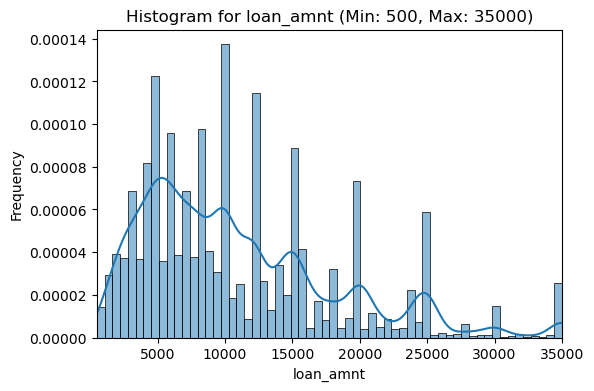

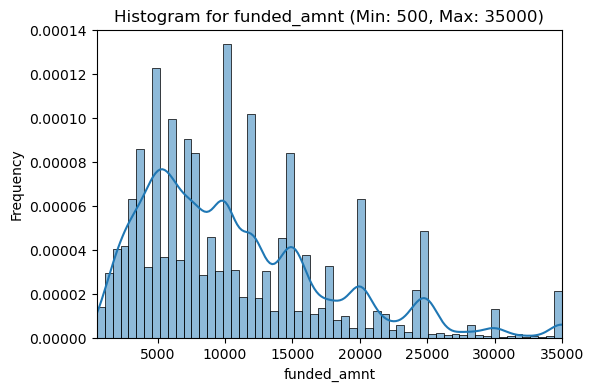

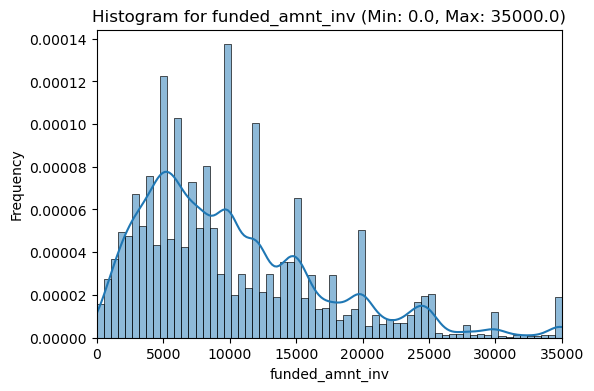

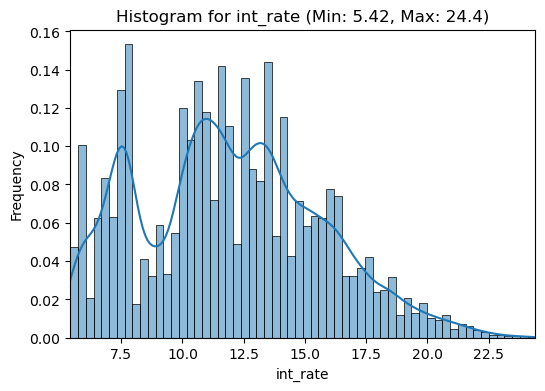

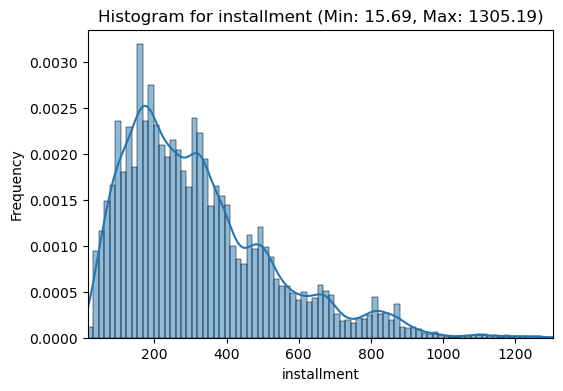

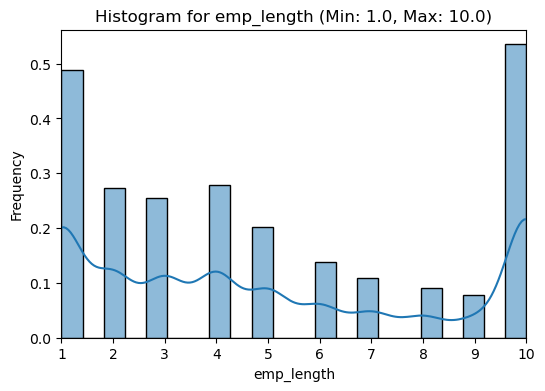

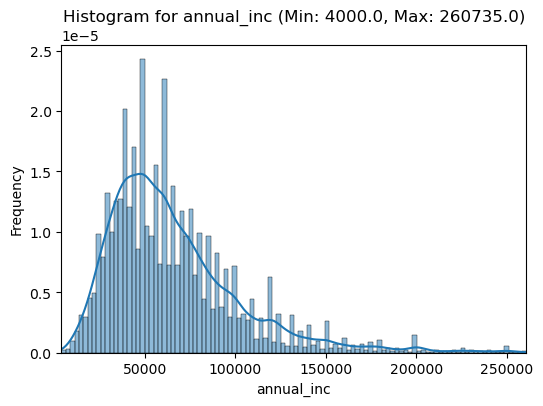

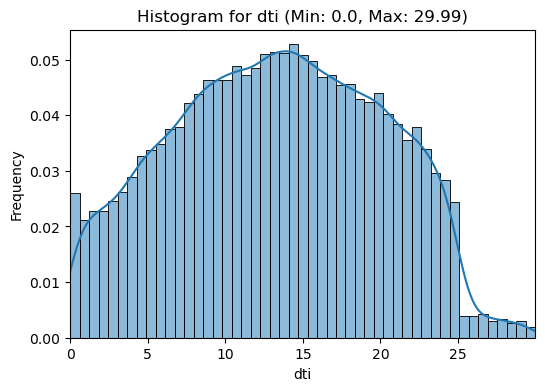

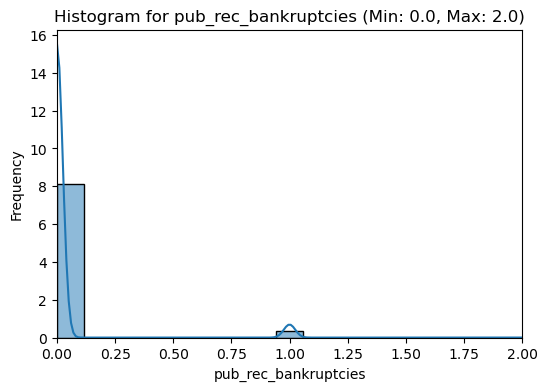

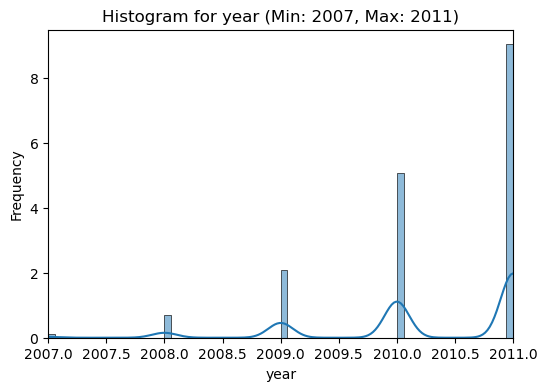

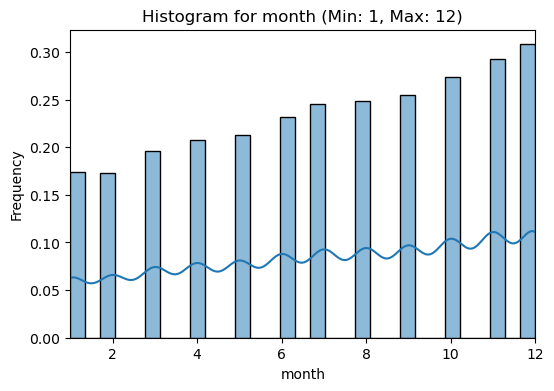

In [40]:
plot_histograms_min_max(loan_df, numerical_columns)

In [41]:
def plot_boxplots(df, columns):
    # Iterate over each specified column
    palette = sns.color_palette("husl", len(columns))
    for i,column in enumerate(columns):
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[column],color=palette[i])
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()

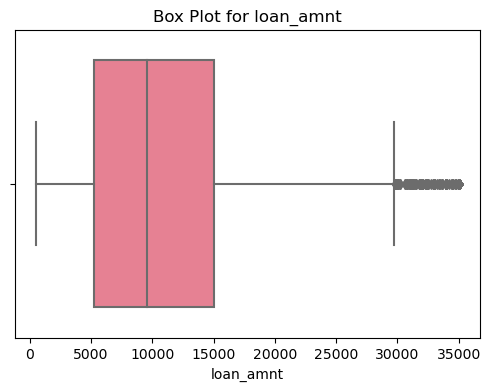

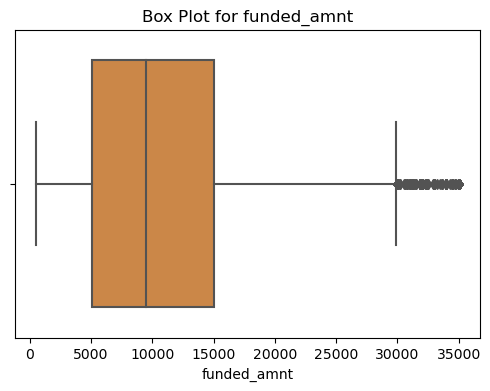

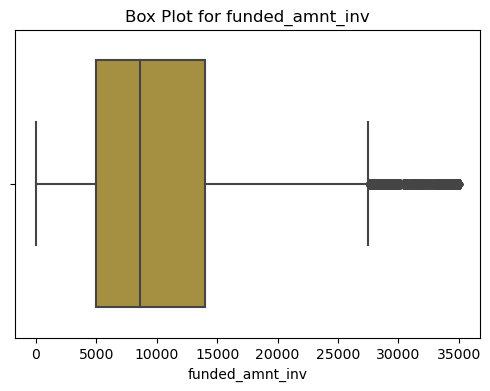

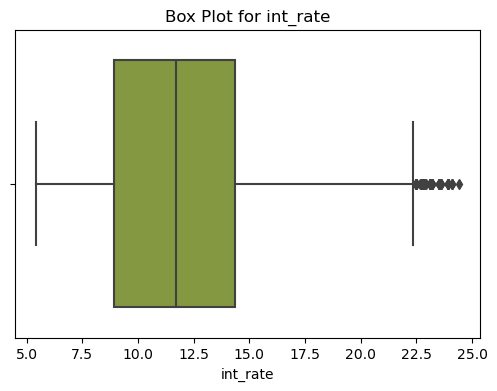

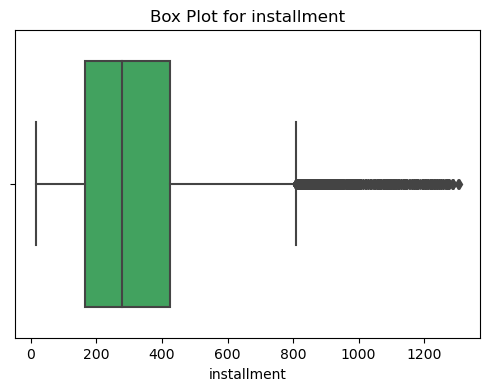

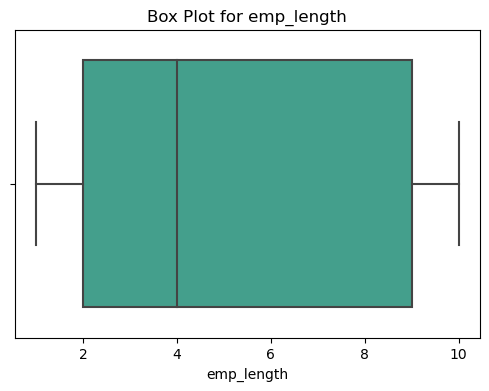

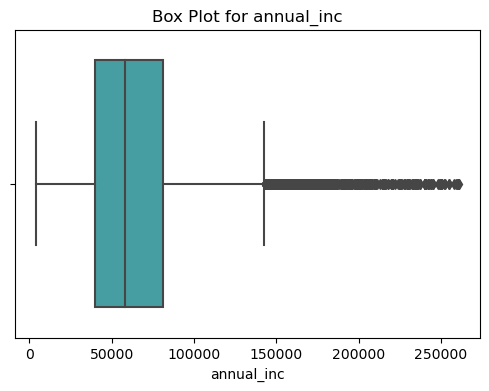

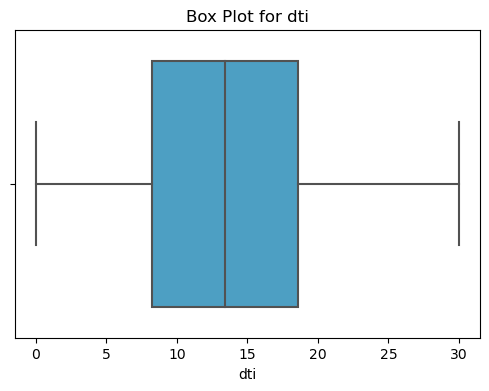

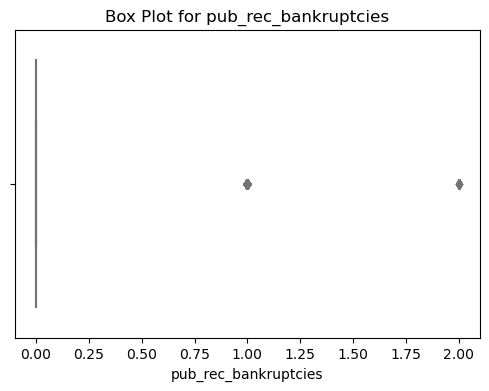

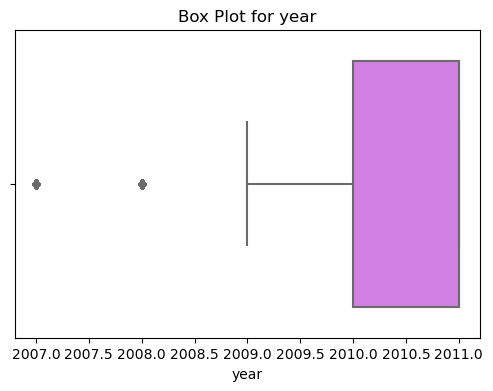

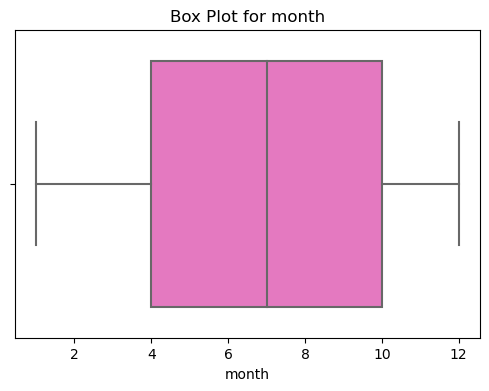

In [42]:
plot_boxplots(loan_df, numerical_columns)

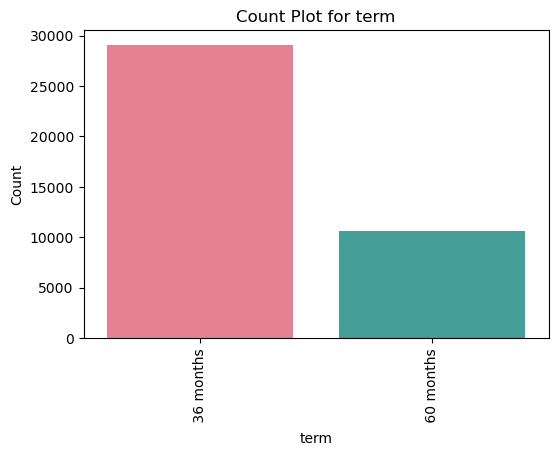

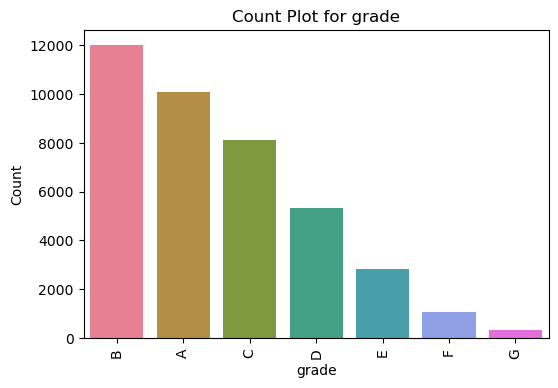

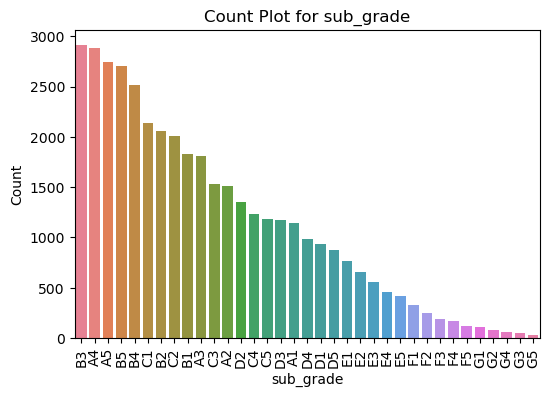

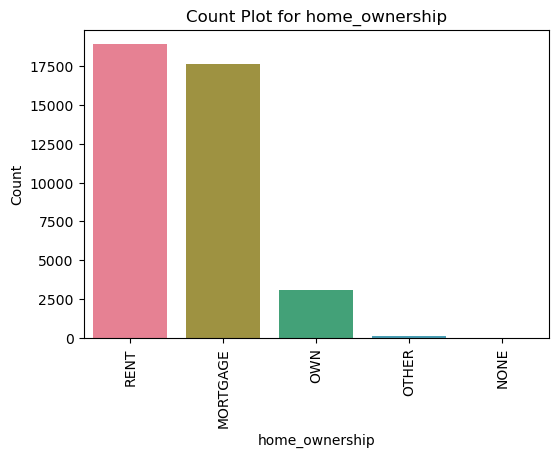

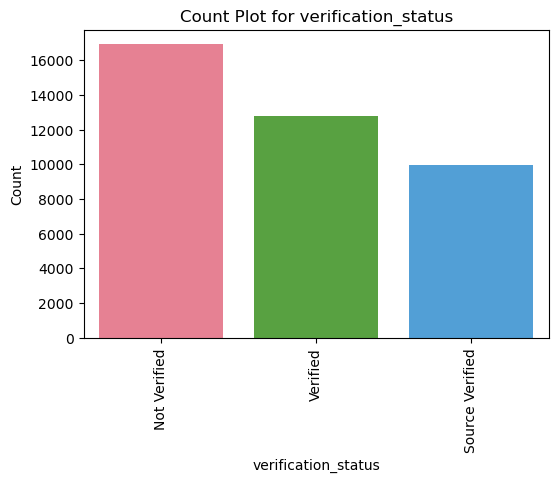

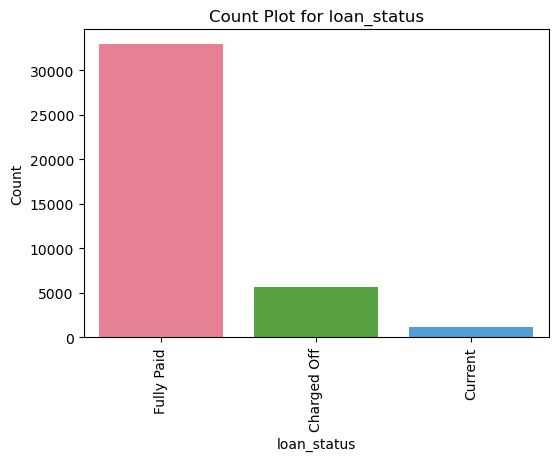

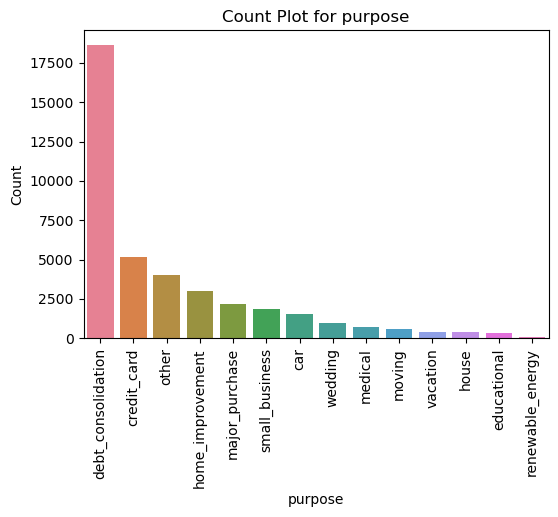

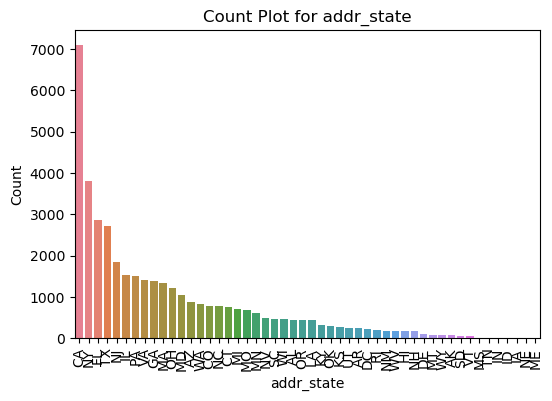

In [43]:
def plot_countplot(df, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df, palette='husl',order=df[column].value_counts().index)
        plt.title(f'Count Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90) 
        plt.show()
plot_countplot(loan, categorical_columns)



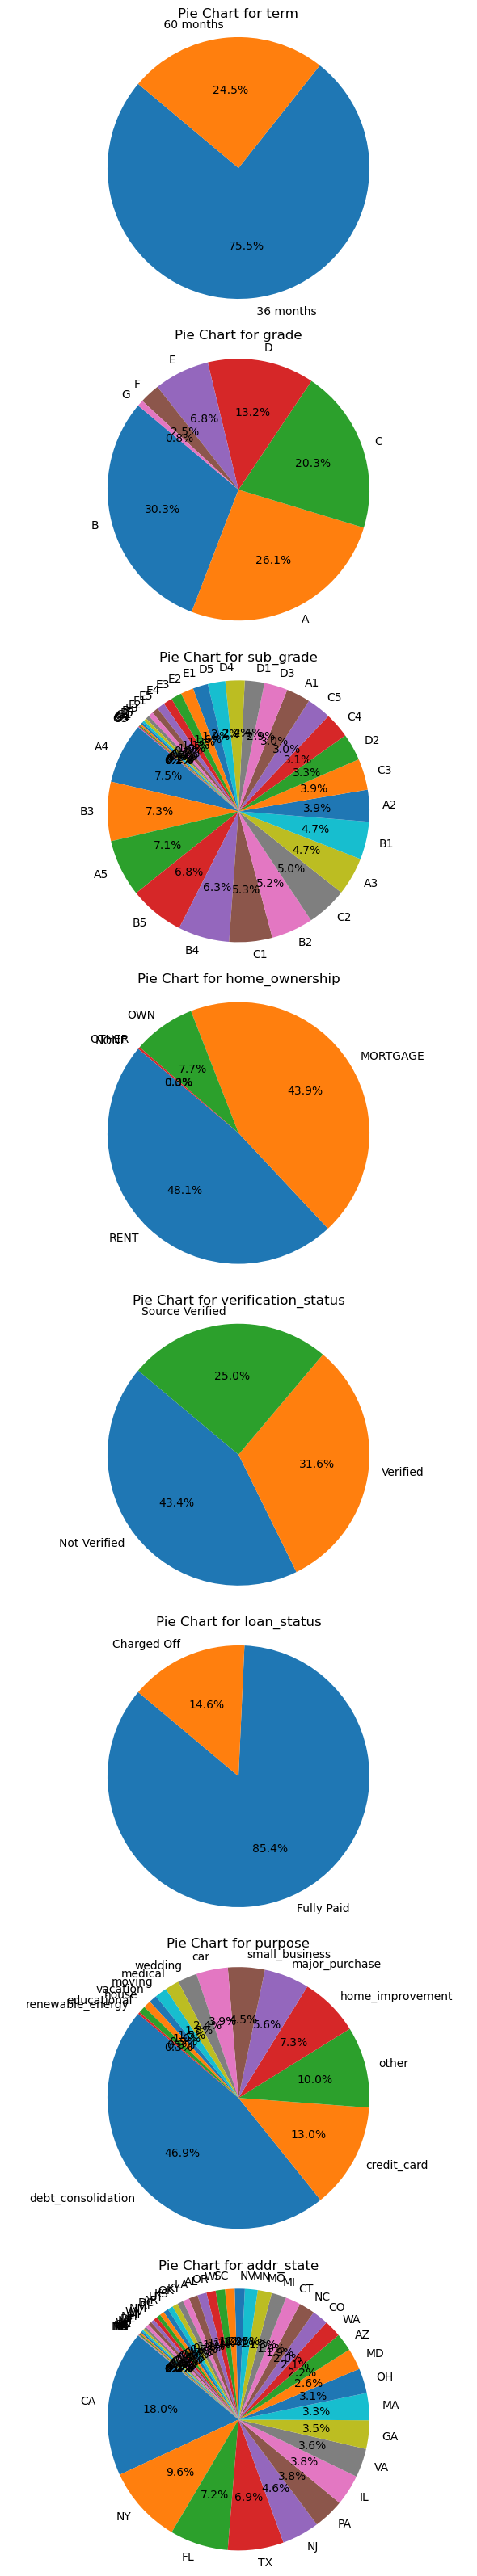

In [44]:
def plot_pie_charts(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(6, num_cols*4))
    
    if num_cols == 1:
        axes = [axes]  # Ensure that axes is always a list

    for i, column in enumerate(columns):
        category_counts = df[column].value_counts()

        # Plot pie chart
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'Pie Chart for {column}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

plot_pie_charts(loan_df, categorical_columns)

### Bivariate Analysis

In [45]:
# New column addition to display the target variable loan_status as a numeric value 
loan_df['loan_status_num']= loan_df['loan_status'].map({'Charged Off':1,'Fully Paid':0})

In [46]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38298 entries, 0 to 38297
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38298 non-null  int64         
 1   funded_amnt           38298 non-null  int64         
 2   funded_amnt_inv       38298 non-null  float64       
 3   term                  38298 non-null  object        
 4   int_rate              38298 non-null  float64       
 5   installment           38298 non-null  float64       
 6   grade                 38298 non-null  object        
 7   sub_grade             38298 non-null  object        
 8   emp_length            38298 non-null  float64       
 9   home_ownership        38298 non-null  object        
 10  annual_inc            38298 non-null  float64       
 11  verification_status   38298 non-null  object        
 12  issue_d               38298 non-null  datetime64[ns]
 13  loan_status     

In [47]:
# Derived columns
# Categorise numeric variables into buckets to find insights in bivariate analysis
loan_df['annual_inc_category']= pd.qcut(loan_df['annual_inc'], q=6)
loan_df['emp_length_category']= pd.cut(loan_df['emp_length'], bins= 9)
loan_df['loan_amnt_category']= pd.cut(loan_df['loan_amnt'], bins= 10)
loan_df['int_rate_category']= pd.cut(loan_df['int_rate'], bins= 9)
loan_df['dti_category']= pd.cut(loan_df['dti'], bins= 6)



In [48]:
loan_df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000          4975.00   36 months     10.65       162.87   
1       2500         2500          2500.00   60 months     15.27        59.83   
2       2400         2400          2400.00   36 months     15.96        84.33   
3      10000        10000         10000.00   36 months     13.49       339.31   
4       5000         5000          5000.00   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  ...   dti pub_rec_bankruptcies  \
0     B        B2       10.00           RENT  ... 27.65                 0.00   
1     C        C4        1.00           RENT  ...  1.00                 0.00   
2     C        C5       10.00           RENT  ...  8.72                 0.00   
3     C        C1       10.00           RENT  ... 20.00                 0.00   
4     A        A4        3.00           RENT  ... 11.20                 0.00   

   year month loan_status_num  annual_inc_category  emp_length_category  \
0  2011    12               0  (3999.999, 35000.0]          (9.0, 10.0]   
1  2011    12               1  (3999.999, 35000.0]         (0.991, 2.0]   
2  2011    12               0  (3999.999, 35000.0]          (9.0, 10.0]   
3  2011    12               0   (46000.0, 58000.0]          (9.0, 10.0]   
4  2011    12               0   (35000.0, 46000.0]           (2.0, 3.0]   

   loan_amnt_category  int_rate_category      dti_category  
0    (3950.0, 7400.0]    (9.638, 11.747]   (24.992, 29.99]  
1     (465.5, 3950.0]   (13.856, 15.964]    (-0.03, 4.998]  
2     (465.5, 3950.0]   (13.856, 15.964]    (4.998, 9.997]  
3   (7400.0, 10850.0]   (11.747, 13.856]  (19.993, 24.992]  
4    (3950.0, 7400.0]     (7.529, 9.638]   (9.997, 14.995]  

[5 rows x 26 columns]

In [49]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38298 entries, 0 to 38297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38298 non-null  int64         
 1   funded_amnt           38298 non-null  int64         
 2   funded_amnt_inv       38298 non-null  float64       
 3   term                  38298 non-null  object        
 4   int_rate              38298 non-null  float64       
 5   installment           38298 non-null  float64       
 6   grade                 38298 non-null  object        
 7   sub_grade             38298 non-null  object        
 8   emp_length            38298 non-null  float64       
 9   home_ownership        38298 non-null  object        
 10  annual_inc            38298 non-null  float64       
 11  verification_status   38298 non-null  object        
 12  issue_d               38298 non-null  datetime64[ns]
 13  loan_status     

In [50]:
#Splitting the variables into Numeric and Categorical Variables for bivariate analysis

num_variables = numerical_columns

categorical_variables = categorical_columns


In [51]:
# Defining some Visualizatio methods so they can be easily called and avoid the duplication of code and improve readablity


def bivariate_cat_heatmap (*, data=loan_df, x, y, title=None, figsize=(22,6)):
    fig, ax = plt.subplots(figsize=figsize)
    pivot = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    s = sns.heatmap(pivot, ax=ax, cmap='crest',annot=True, annot_kws={"size":8})
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    if title is not None:
        plt.title(title)
    plt.show()

def bivariate_cat_barplot(feature,label_rotation=False,horizontal_layout=True):
    sns.set(font_scale=1)
    tmp = loan_df[feature].value_counts()
    df1 = pd.DataFrame({feature: tmp.index,'Number of Loan Applications': tmp.values})

    # Calculate the percentage of loan_status_num =1 per category value
    category_percent = loan_df[[feature, 'loan_status_num']].groupby([feature],as_index=False).mean()
    category_percent.sort_values(by='loan_status_num', ascending=False, inplace=True)

    sns.set(font_scale=1.0)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))     
    
    s = sns.barplot(ax=ax1, x = feature, y="Number of Loan Applications",data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='loan_status_num', data=category_percent)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percentage of Charged Off')
    
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show()

def bivariate_cat_num_boxplot(feature,numeric,title=None, order=None):
    sns.set(font_scale=1.5)
    plt.figure(figsize=(32,10))
    ax = sns.boxplot(y=numeric, x=feature, hue= 'loan_status', data =loan_df,palette='rainbow',order=order)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(numeric)
    ax.set_xlabel(feature)
    plt.show()

def bivariate_cat_num_barplot(feature,numeric,title=None,order=None, hue='loan_status'):
    sns.set(font_scale=1)
    plt.figure(figsize=(22,6))
    ax = sns.barplot(y=numeric, x=feature, hue = hue, data =loan_df,palette='rainbow',order=order)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_xlabel(feature)
    ax.set_ylabel(numeric)
    plt.show()

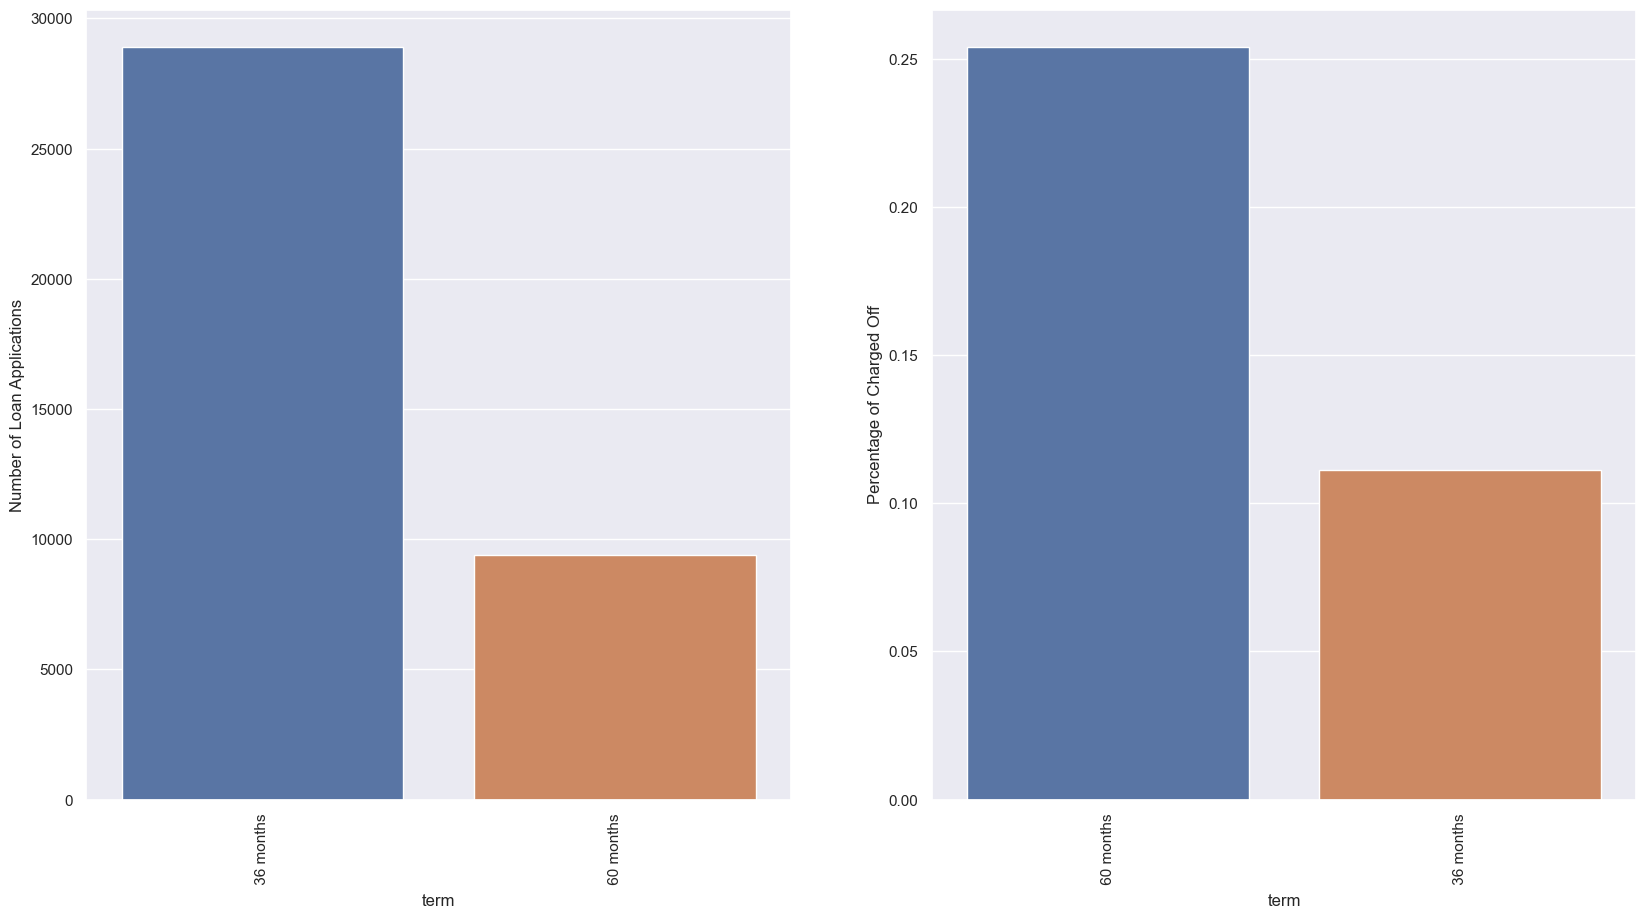

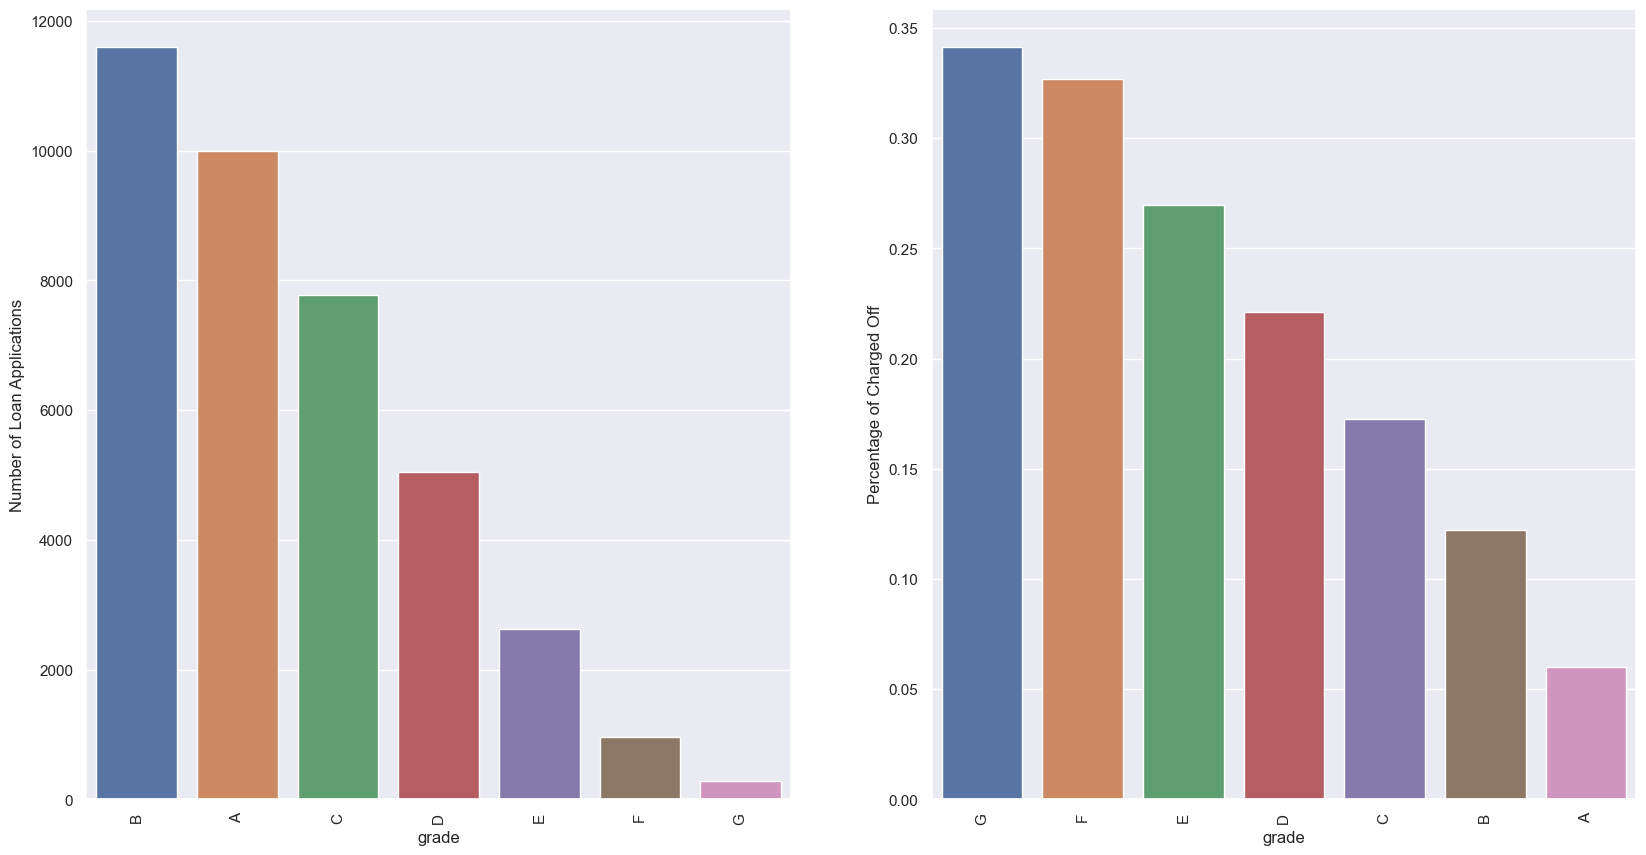

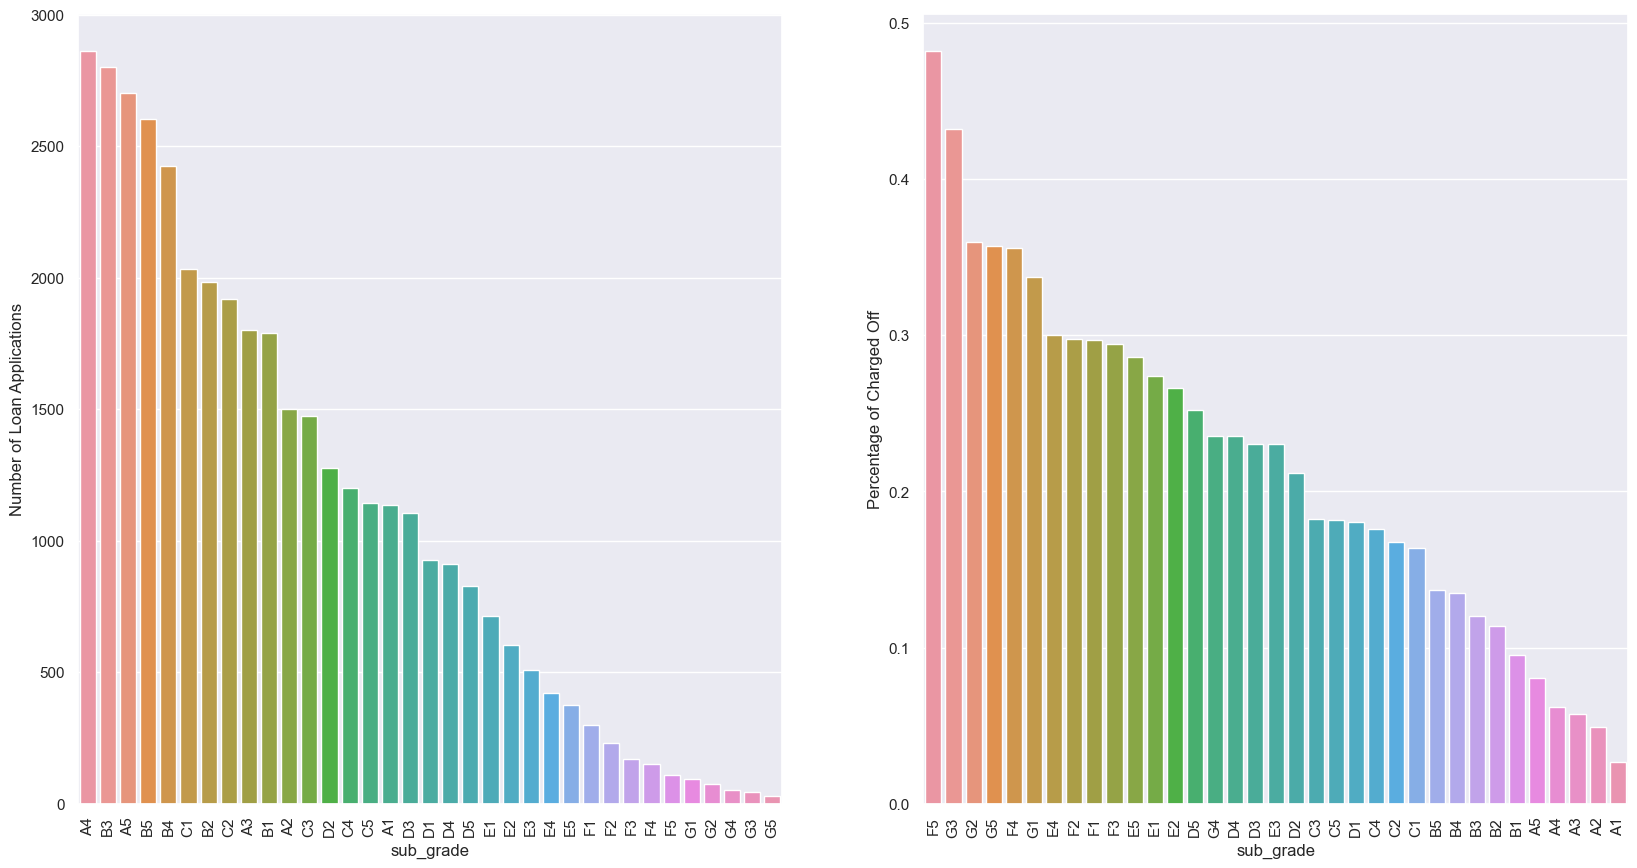

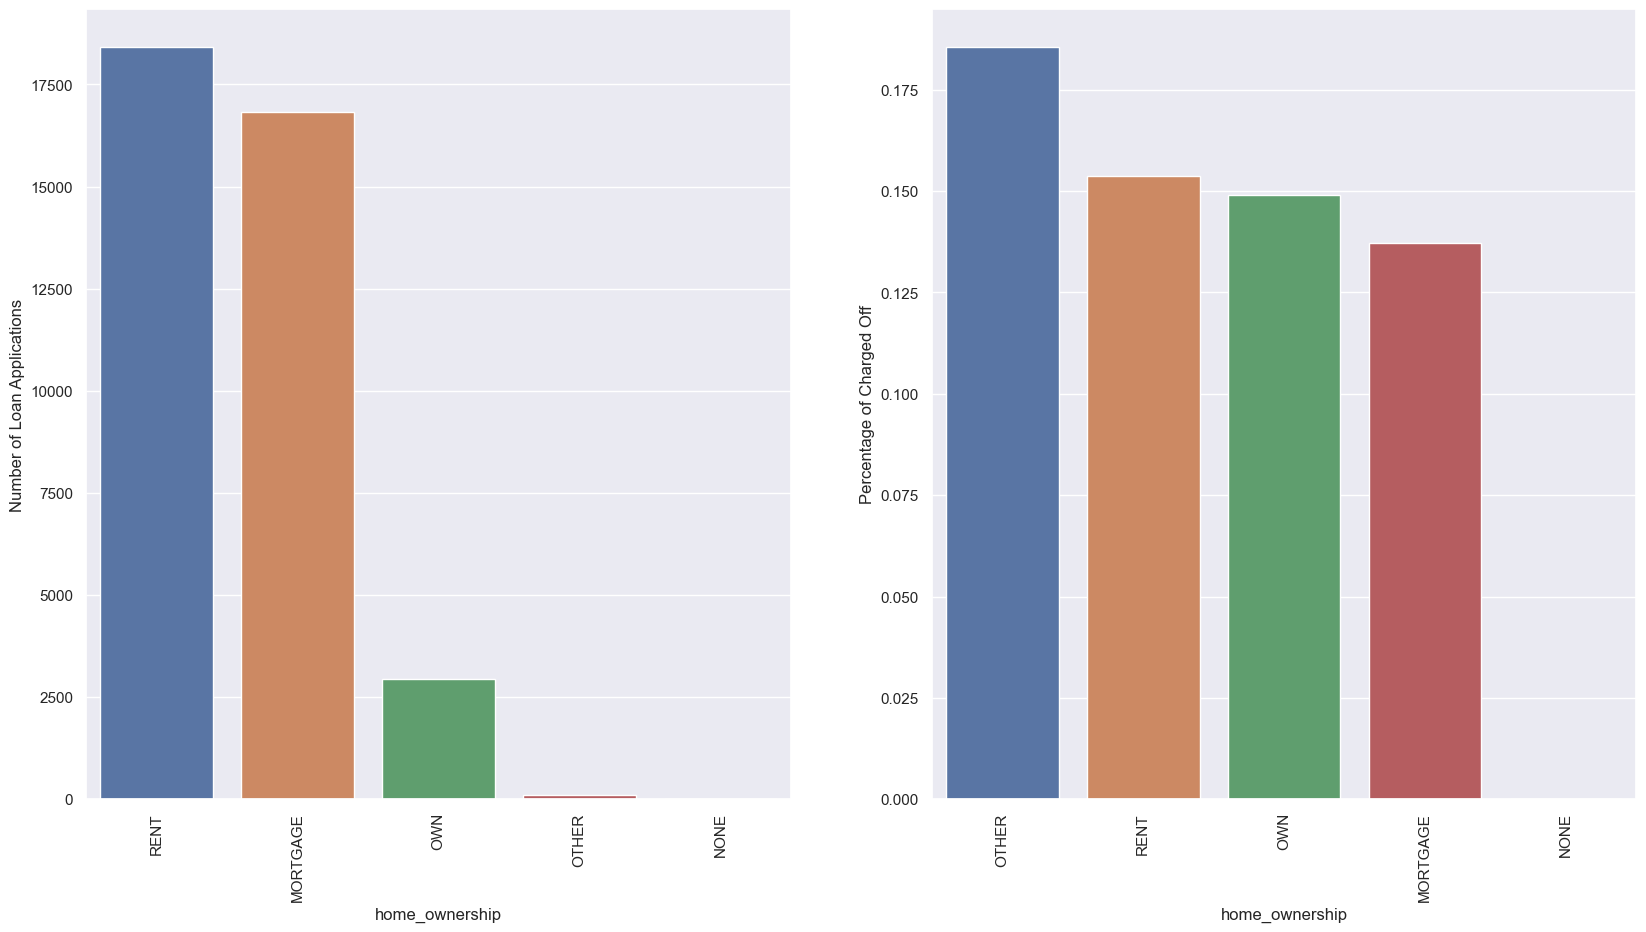

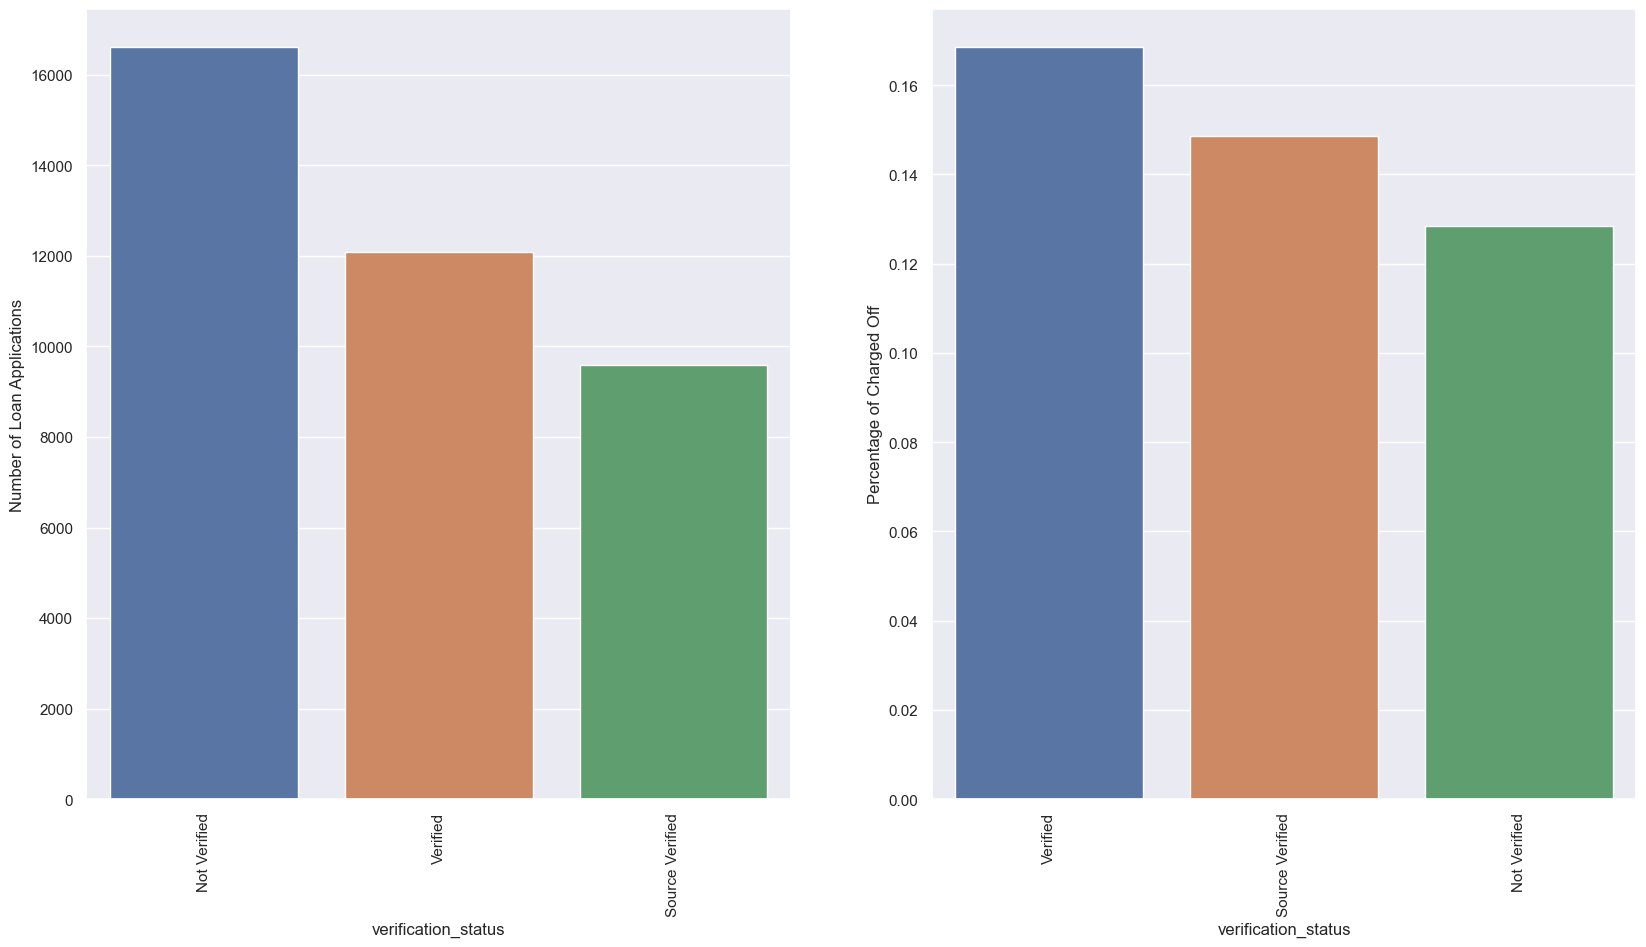

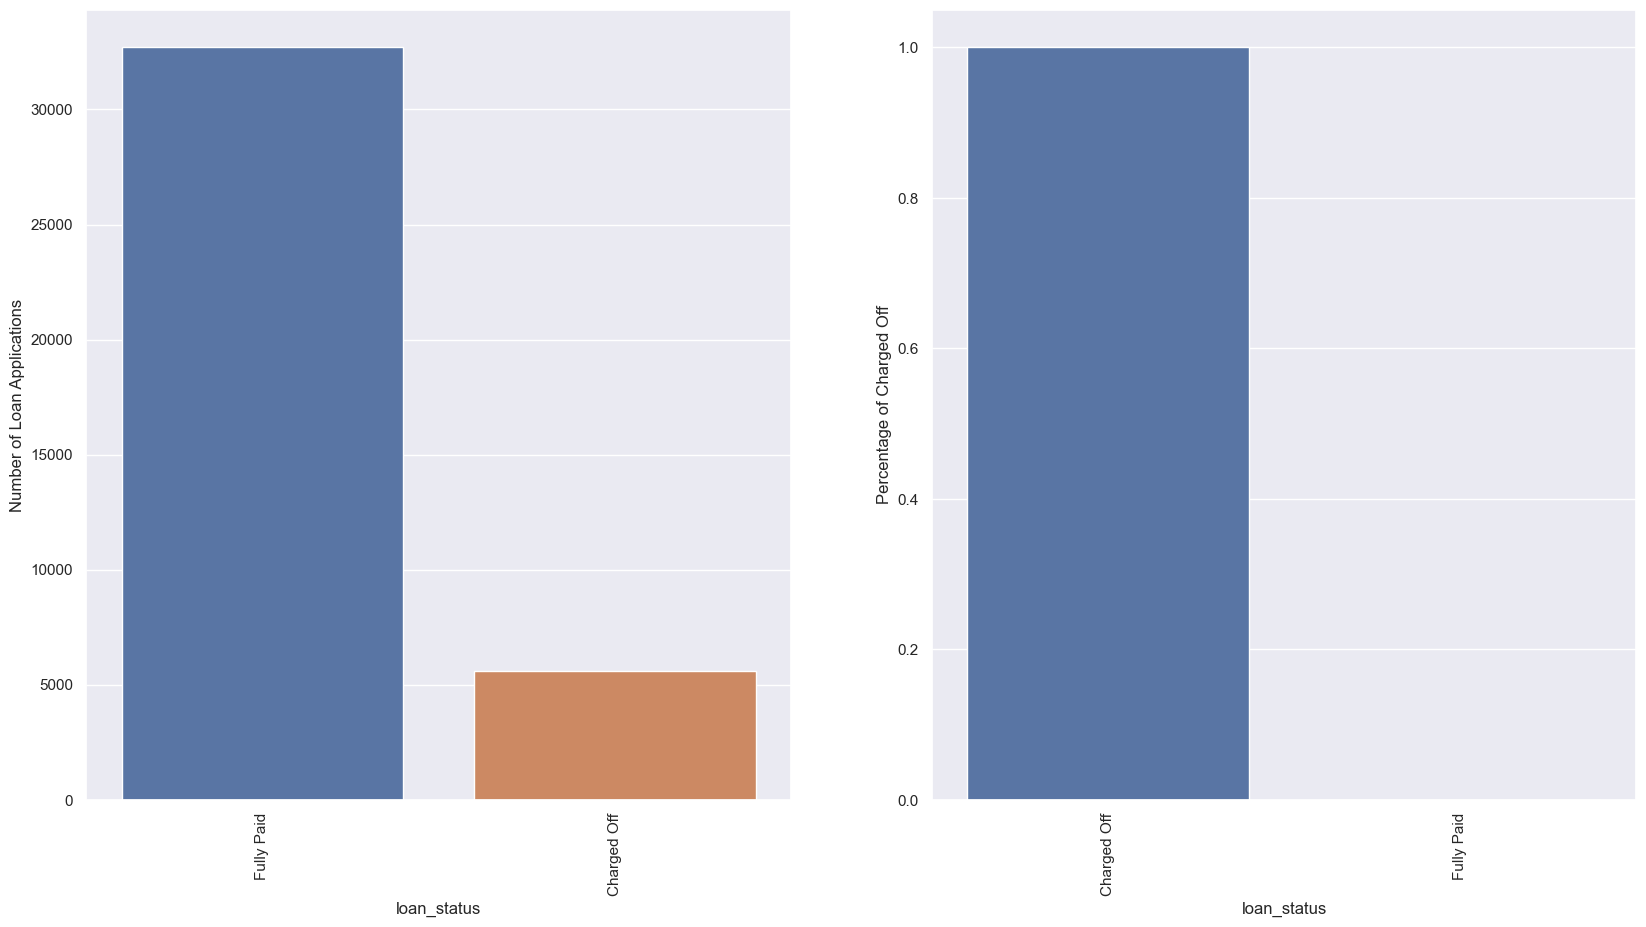

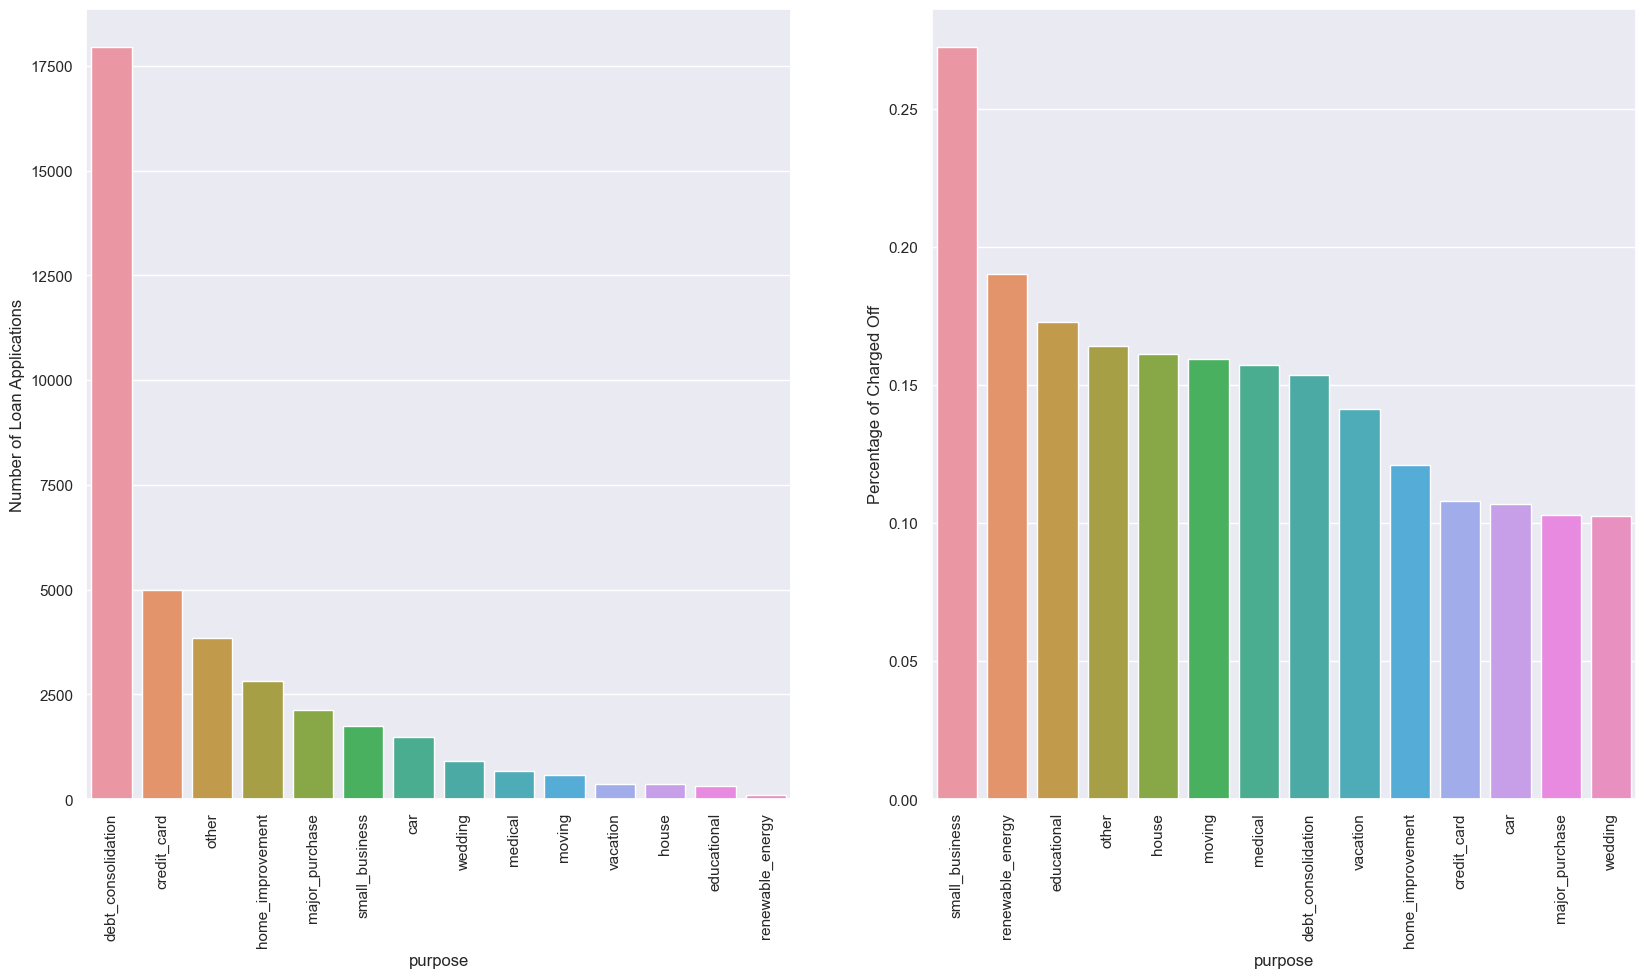

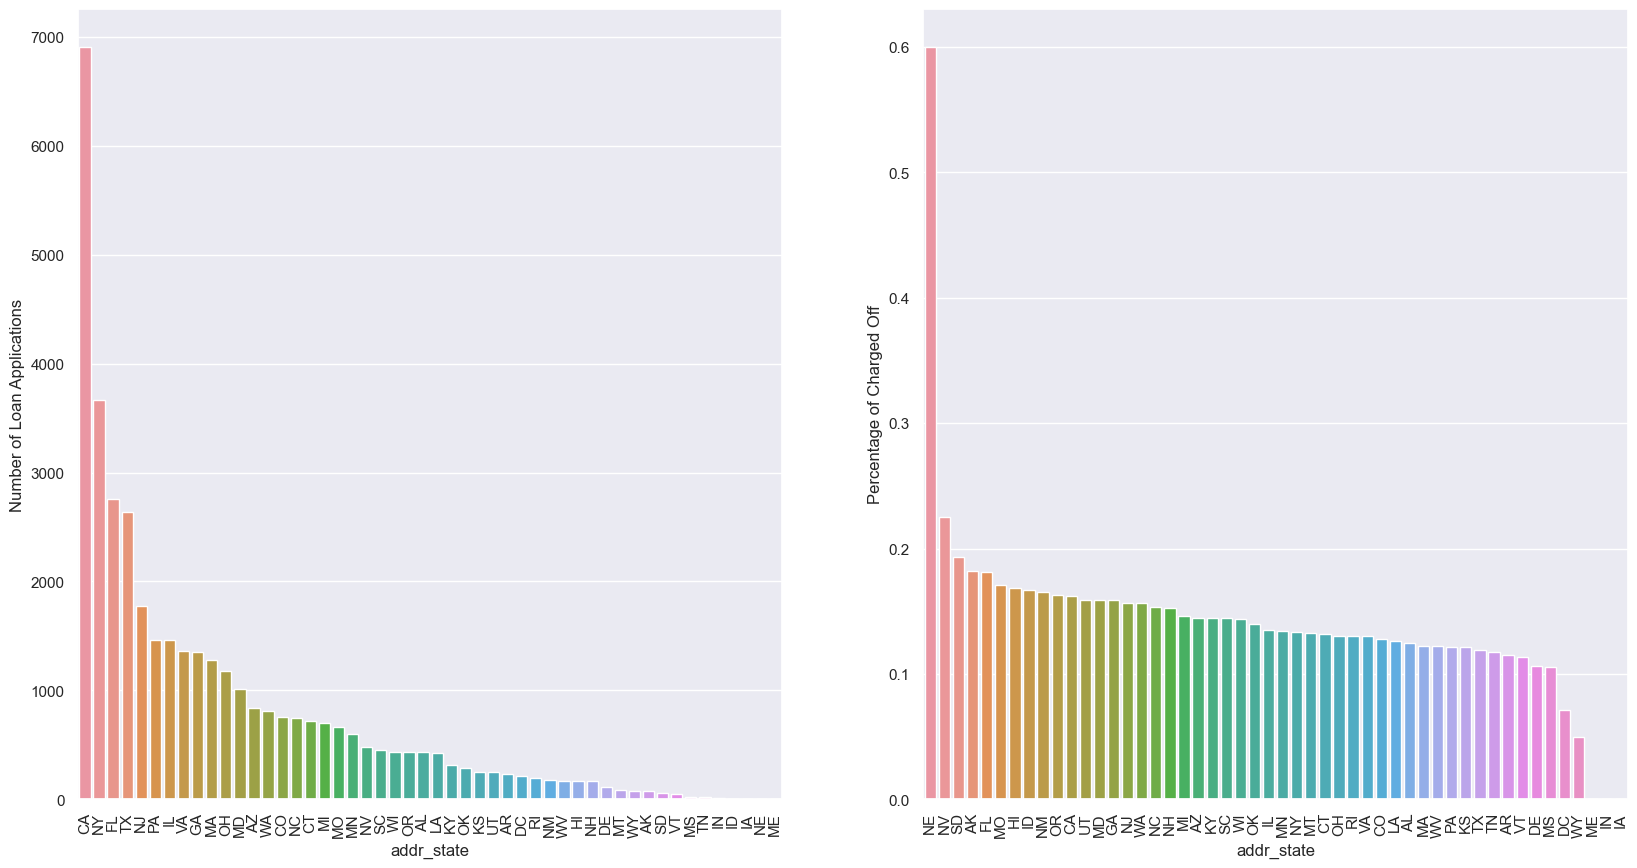

In [52]:
# Generating Barplots showing the values for Categorical variables and their Percentage Charged Off 
for category in categorical_variables:
    bivariate_cat_barplot(category)

##### Observations - 
- **Term vs Percentage Charged Off**: Maximum number of Loans are taken for 36 months timeframe but **maximum charged offs occured in 60 months term** As the term increases the risk of default also increases.
- **Grade vs Percentage Charged Off**: As the investment **grades increases the Charged Off percentage decreases**. The trend is **very accurate** and can be used for defaulting check.
- **Sub Grade vs Percentage Charged Off**: Same trend as Grade is observed here as well, **lower the sub grade more is the risk of defaulting**.
- **Home Ownership vs Percentage Charged Off**: Other is having highest defaulting but is the least number of loan applications. So next ones majorly contributing are Rent and Mortgages. where Rent more than 15% of rent category are charged off.
- **Purpose vs Percentage Charged Off**: Maximum loan applications come from debt_consolidation but the default rate is high for small_business category which needs to be analysed further.
- **State vs Percentage Charged Off**: NE state has highest default rate ~60% but the loan applications are not high, Other High loan Application States like CA , NY etc have > 15% default pecentage which can be analysed further.
- **Public Record of Bankruptcies vs Percentage Charged Off**: Here we can clearly see that **applciations having bankruptcies records prior to applying are highly likely to default** and lenders should stop lending to such applicants.
- **Annual Income vs Percentage Charged Off**: Highest Charged off Percent is for applicant below 35k annual income and highest loan is taken by them,. The bar plot shows that the as the income increases the chances of defaulting reduces but not to a great extent since the highest earning bucket still accounts for >10% Charged off.
- **Employement Length vs Percentage Charged Off**: We can observe here that the default rates accross various buckets all lie between 12- 16 % and is evenly spread so we can say that length is not a significant driver for defaults.
- **Loan Amount vs Percentage Charged Off**: We have divided the loan amount into 10 buckets, and based on the bar plot we can observe that **default rate increases with increase in loan amount**, the increase in default percent is **more on amounts > 15K**. So **limiting the loan amount to less that 15K might help in reducing the default**.
- **Interest Rate vs Percentage Charged Off**: **Higher the interest Rates higher the default percentage**.
- **Debt to Income Ratio vs Percentage Charged Off** : Higher DTI > 15% results in more risk of default
- **Issue Month vs Percentage Charged Off**: Months of Dec, May, Sept have high default rates 


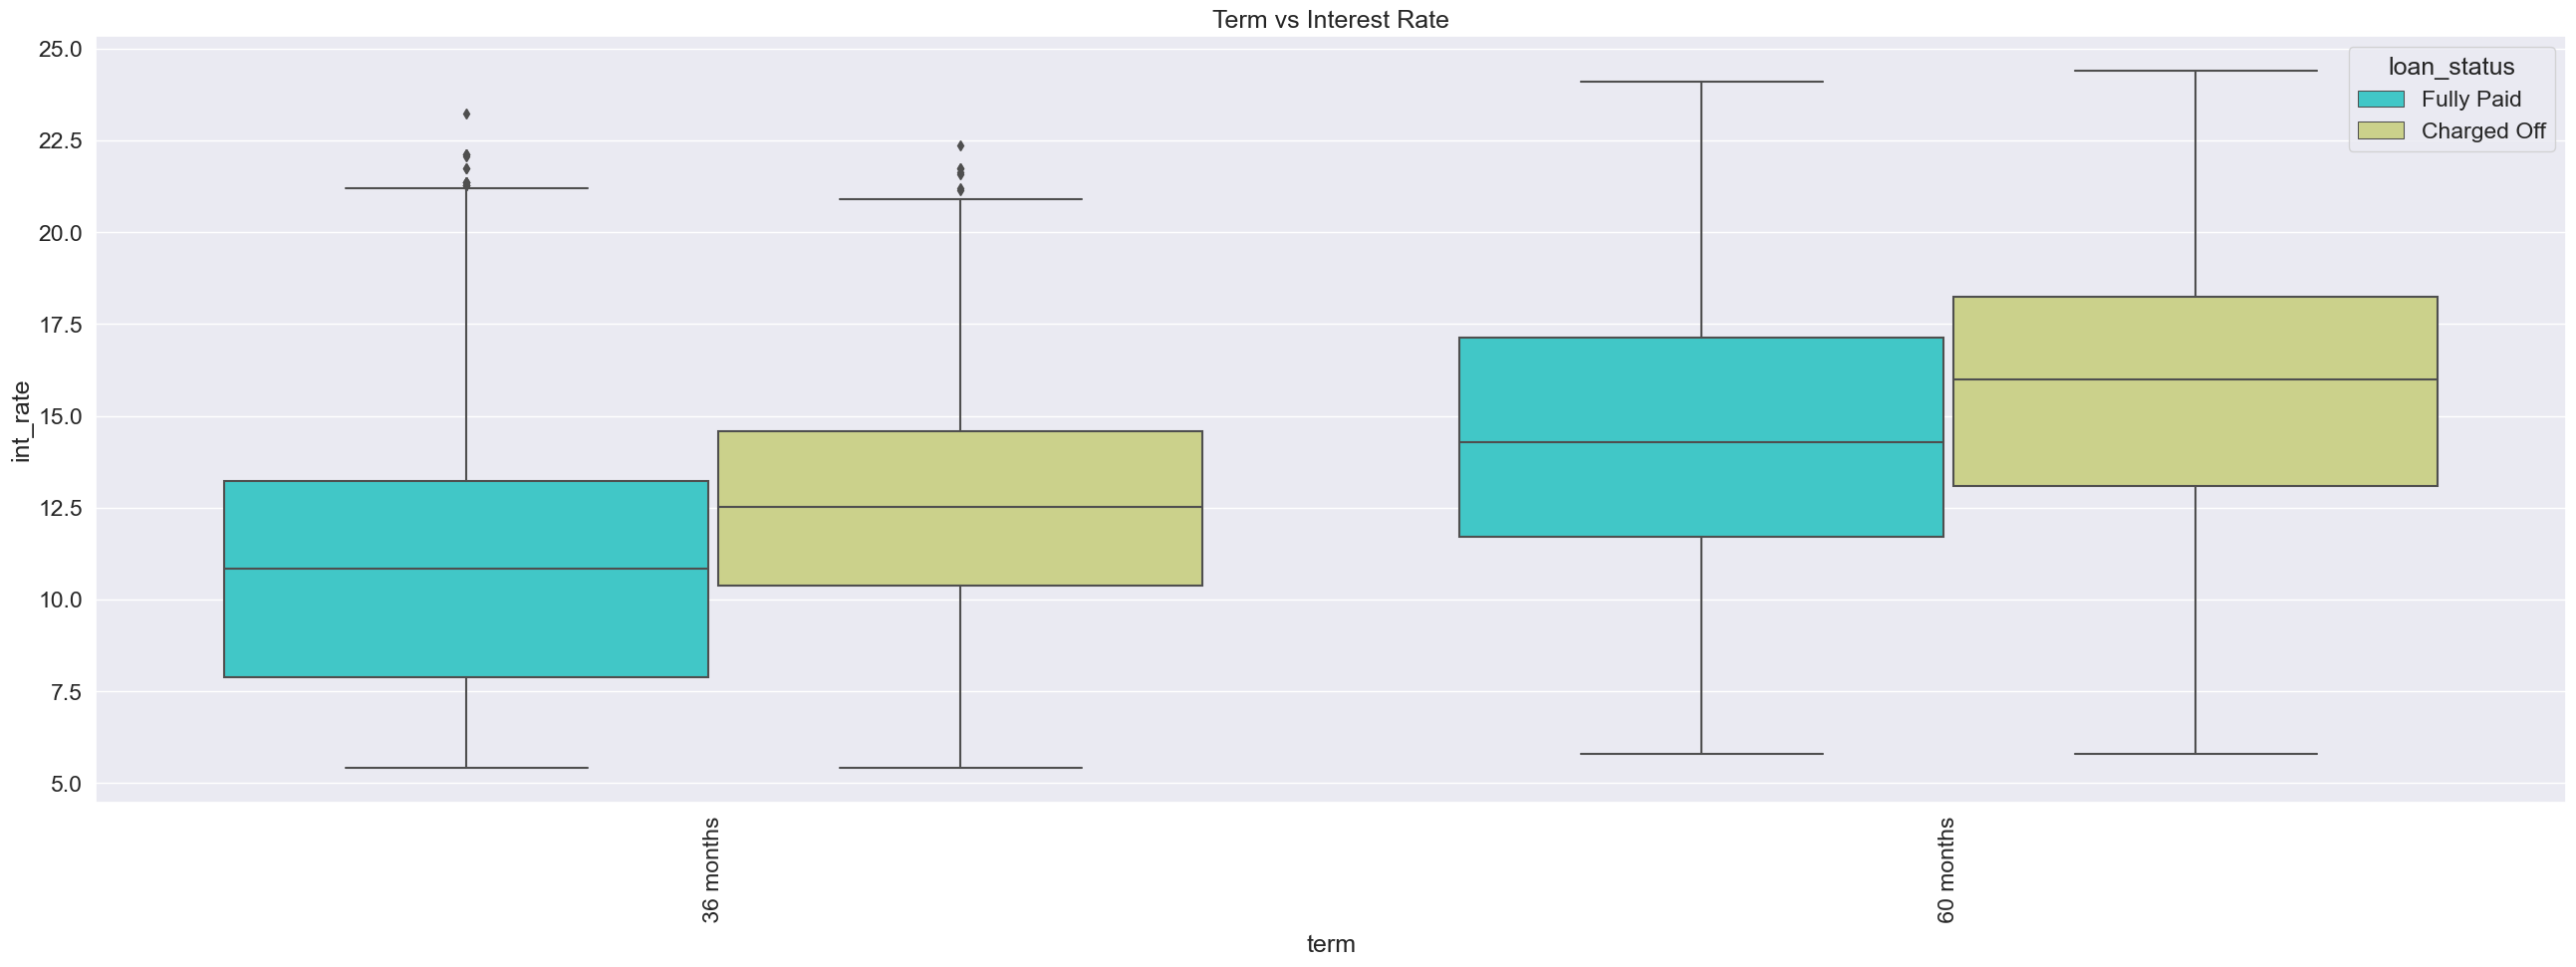

In [53]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot
bivariate_cat_num_boxplot('term','int_rate', title="Term vs Interest Rate")

#### Observation 
- Interest rate increase with term and 60 months have higher average interest rate. and we have observed that the default percentage is more for 60 months term indicating higher interest rates might be the driver. Also the higher interest rates in short term loans cause more charged offs

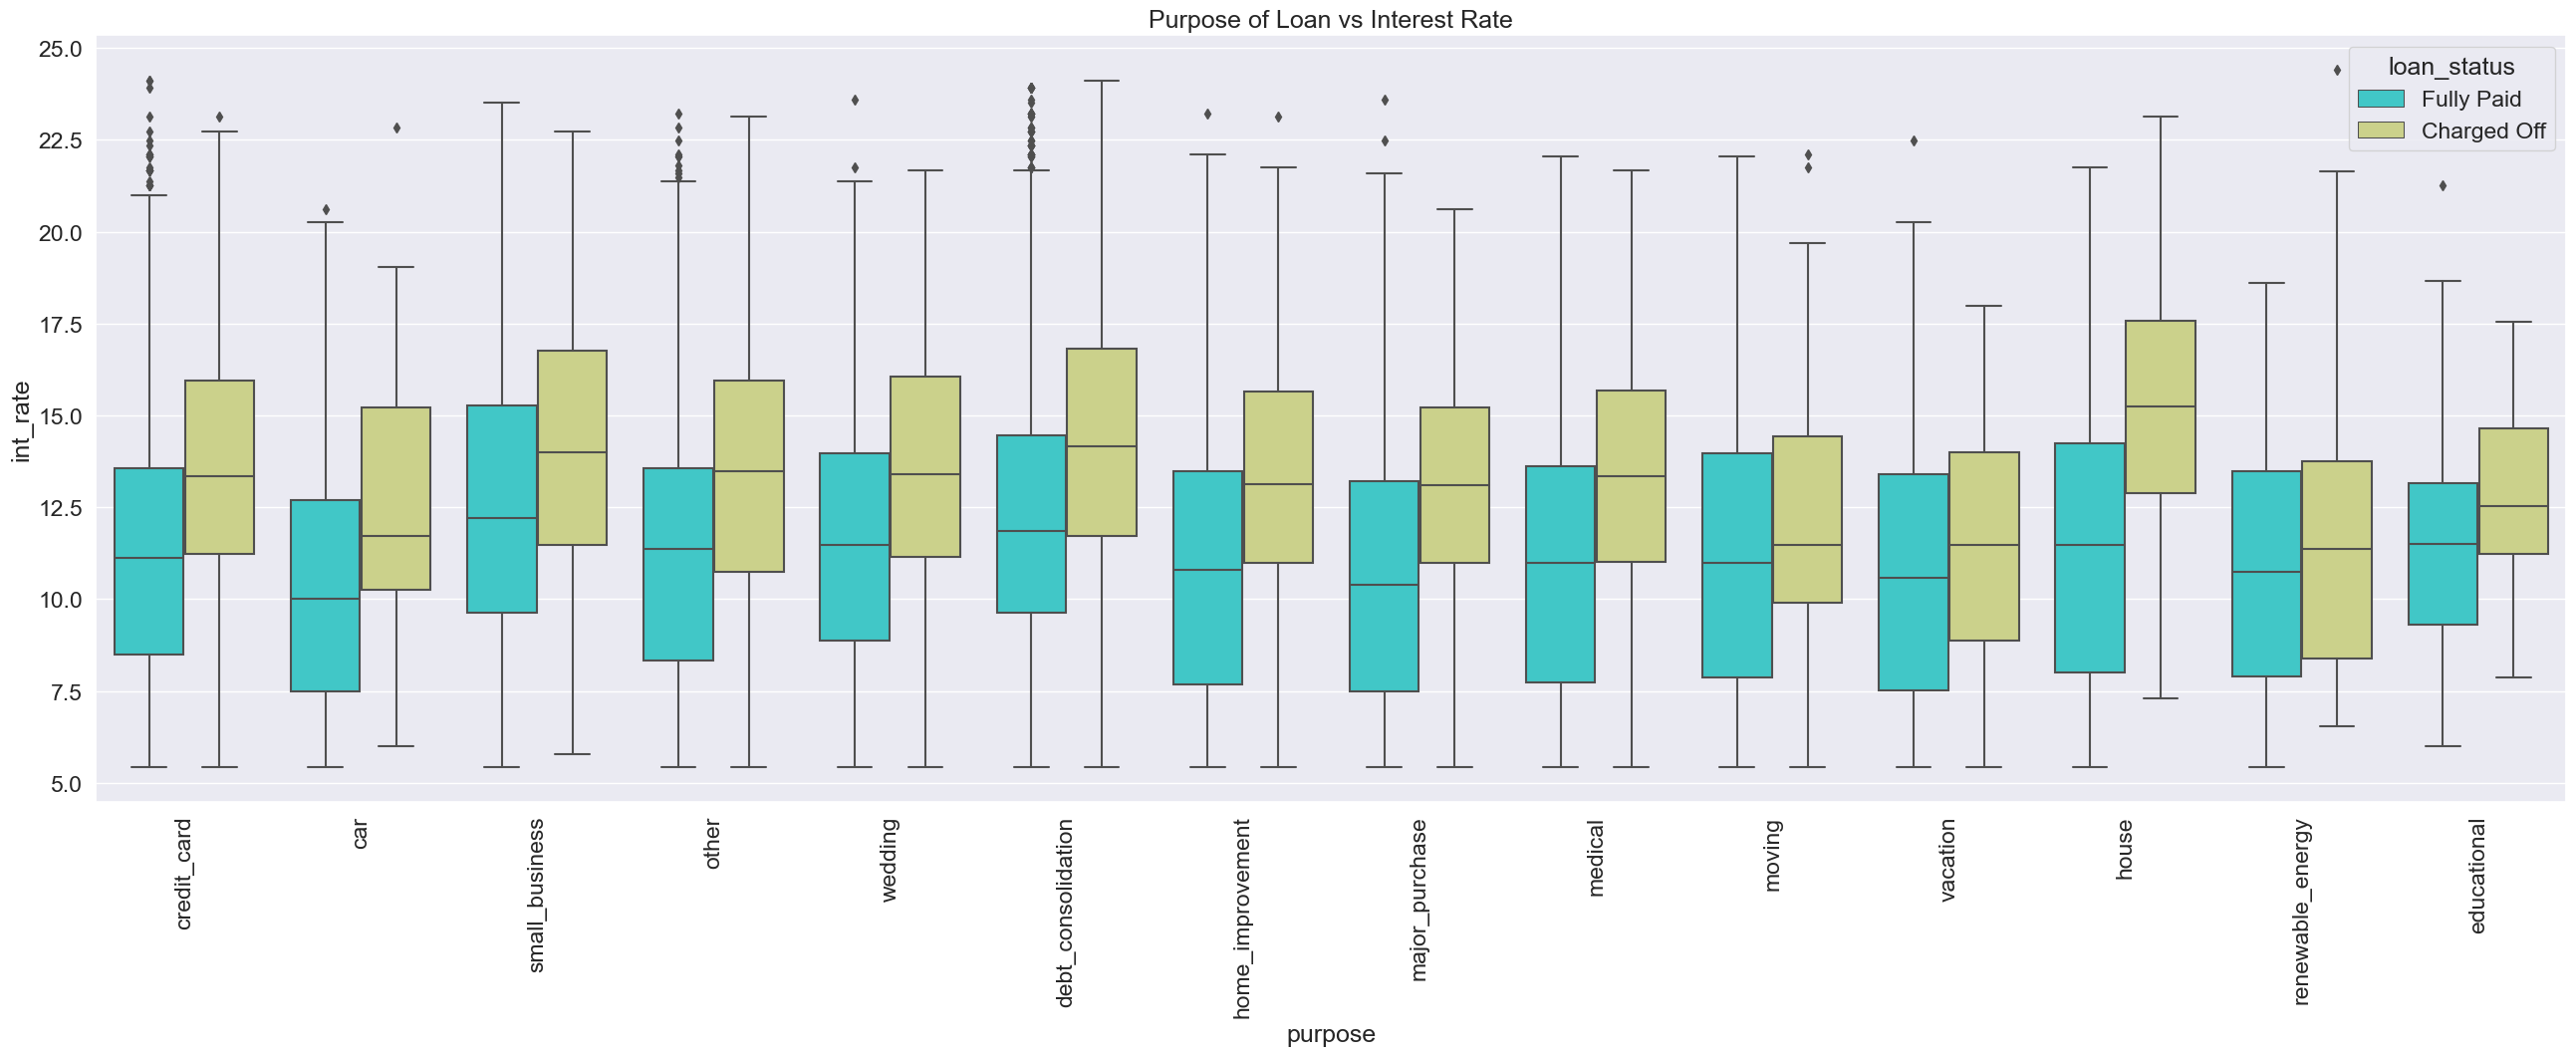

In [54]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot
bivariate_cat_num_boxplot('purpose','int_rate', title="Purpose of Loan vs Interest Rate")

#### Observation 
- Median Interest Rates are higher for loan applications for small business followed by the debt_consolidation, renewable energy and educational , which are major catagories where we see high charged off percent. Defaulters in house category were charged very high median interest rates

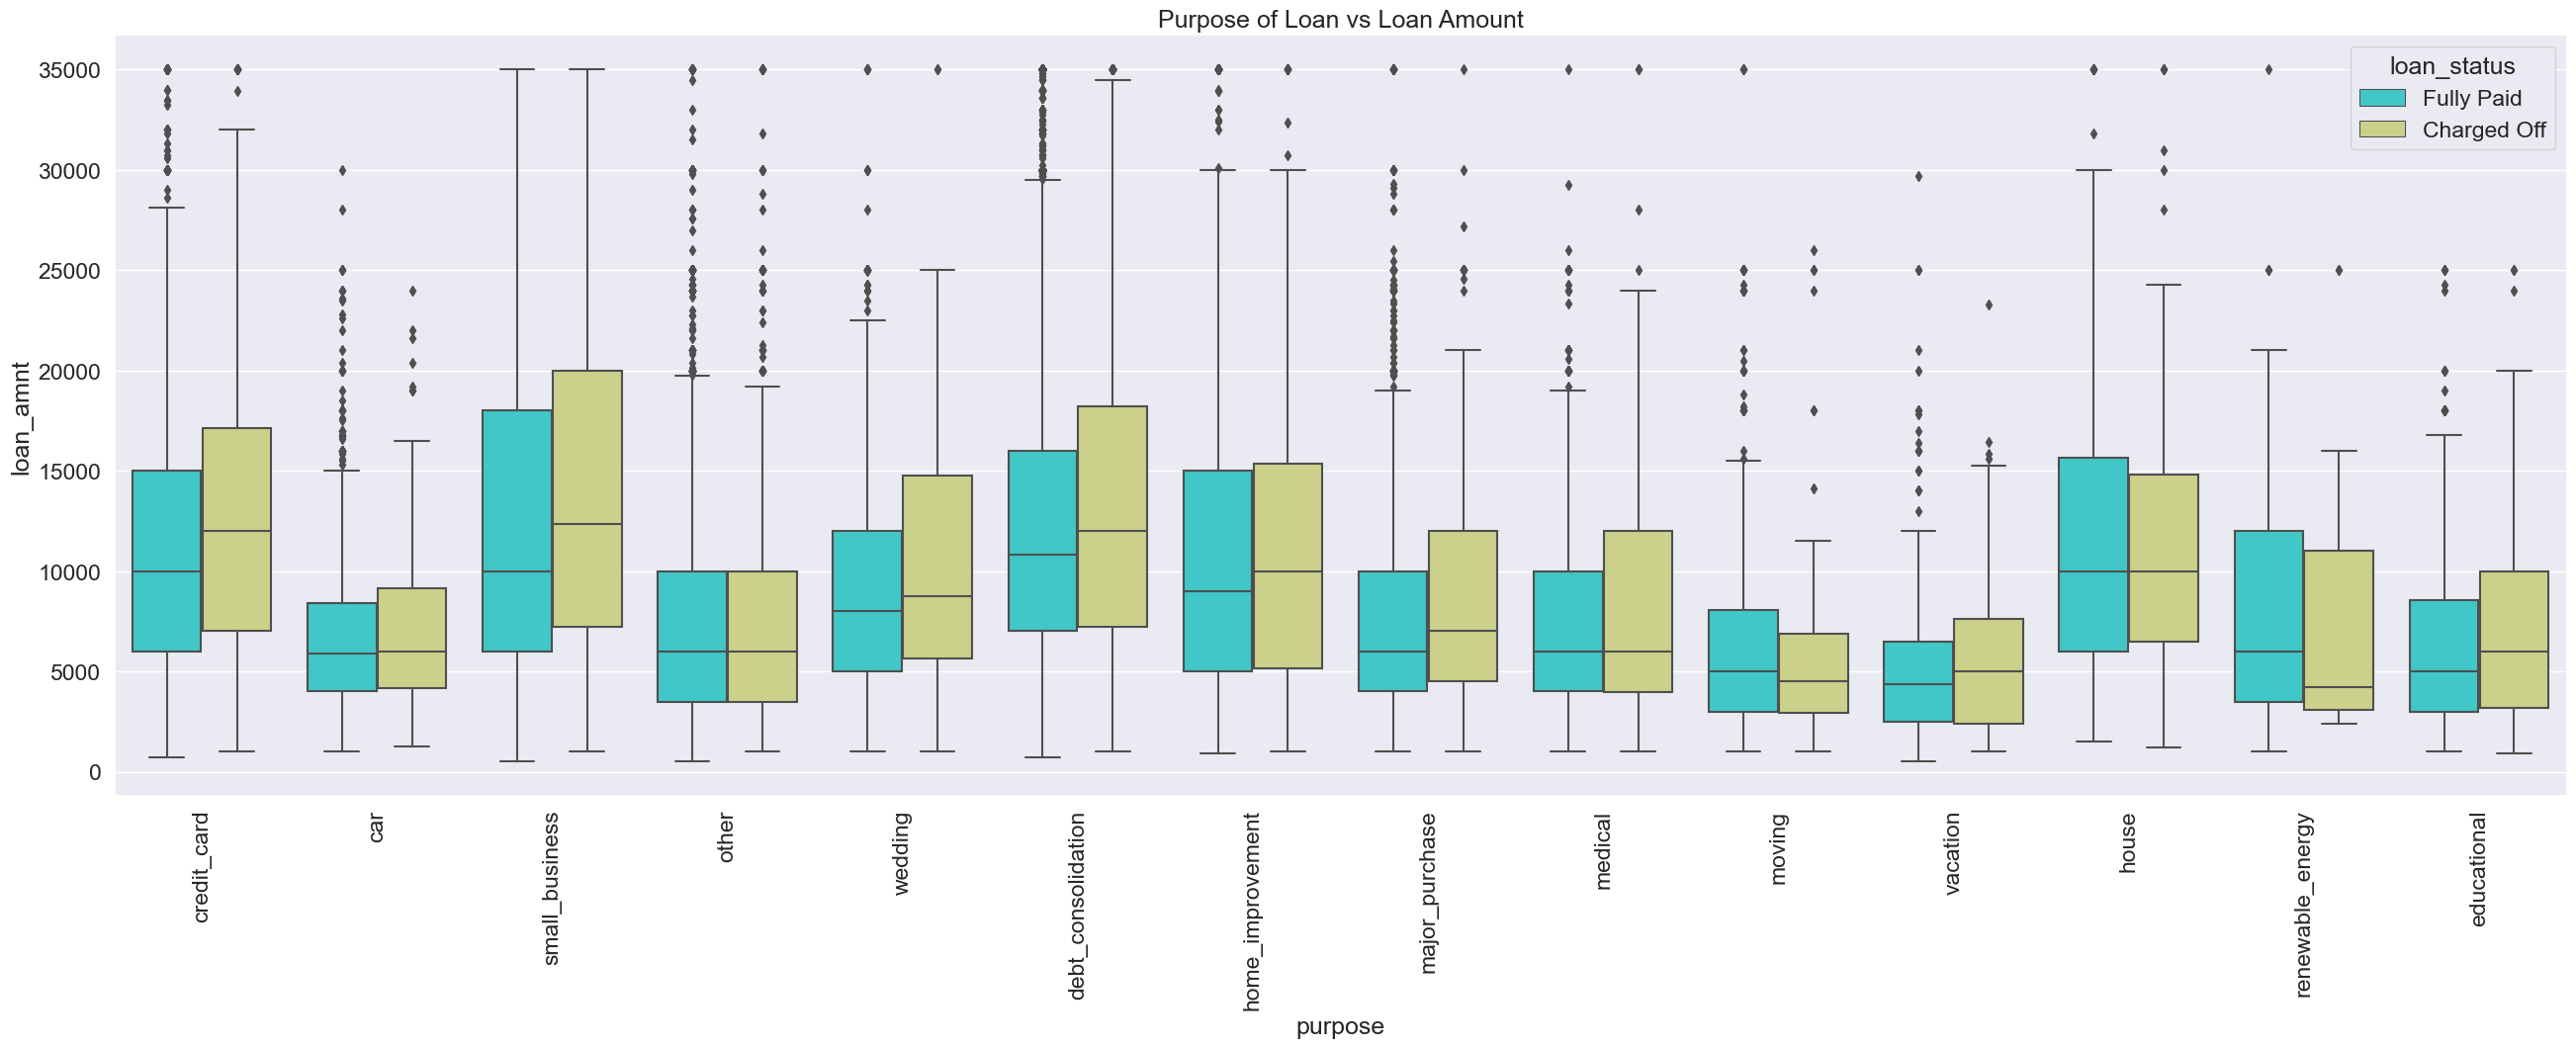

In [55]:
# Bivariate Analysis - Purpose vs Loan Amount
# Box Plot
bivariate_cat_num_boxplot('purpose','loan_amnt', title="Purpose of Loan vs Loan Amount")

#### Observation 
- Categories of Credit Cards , Small Business, Debt Consolidation, see higher default numbers if the loan amount is above 10K
- In general loan amounts above 15K are more likely to get charged off

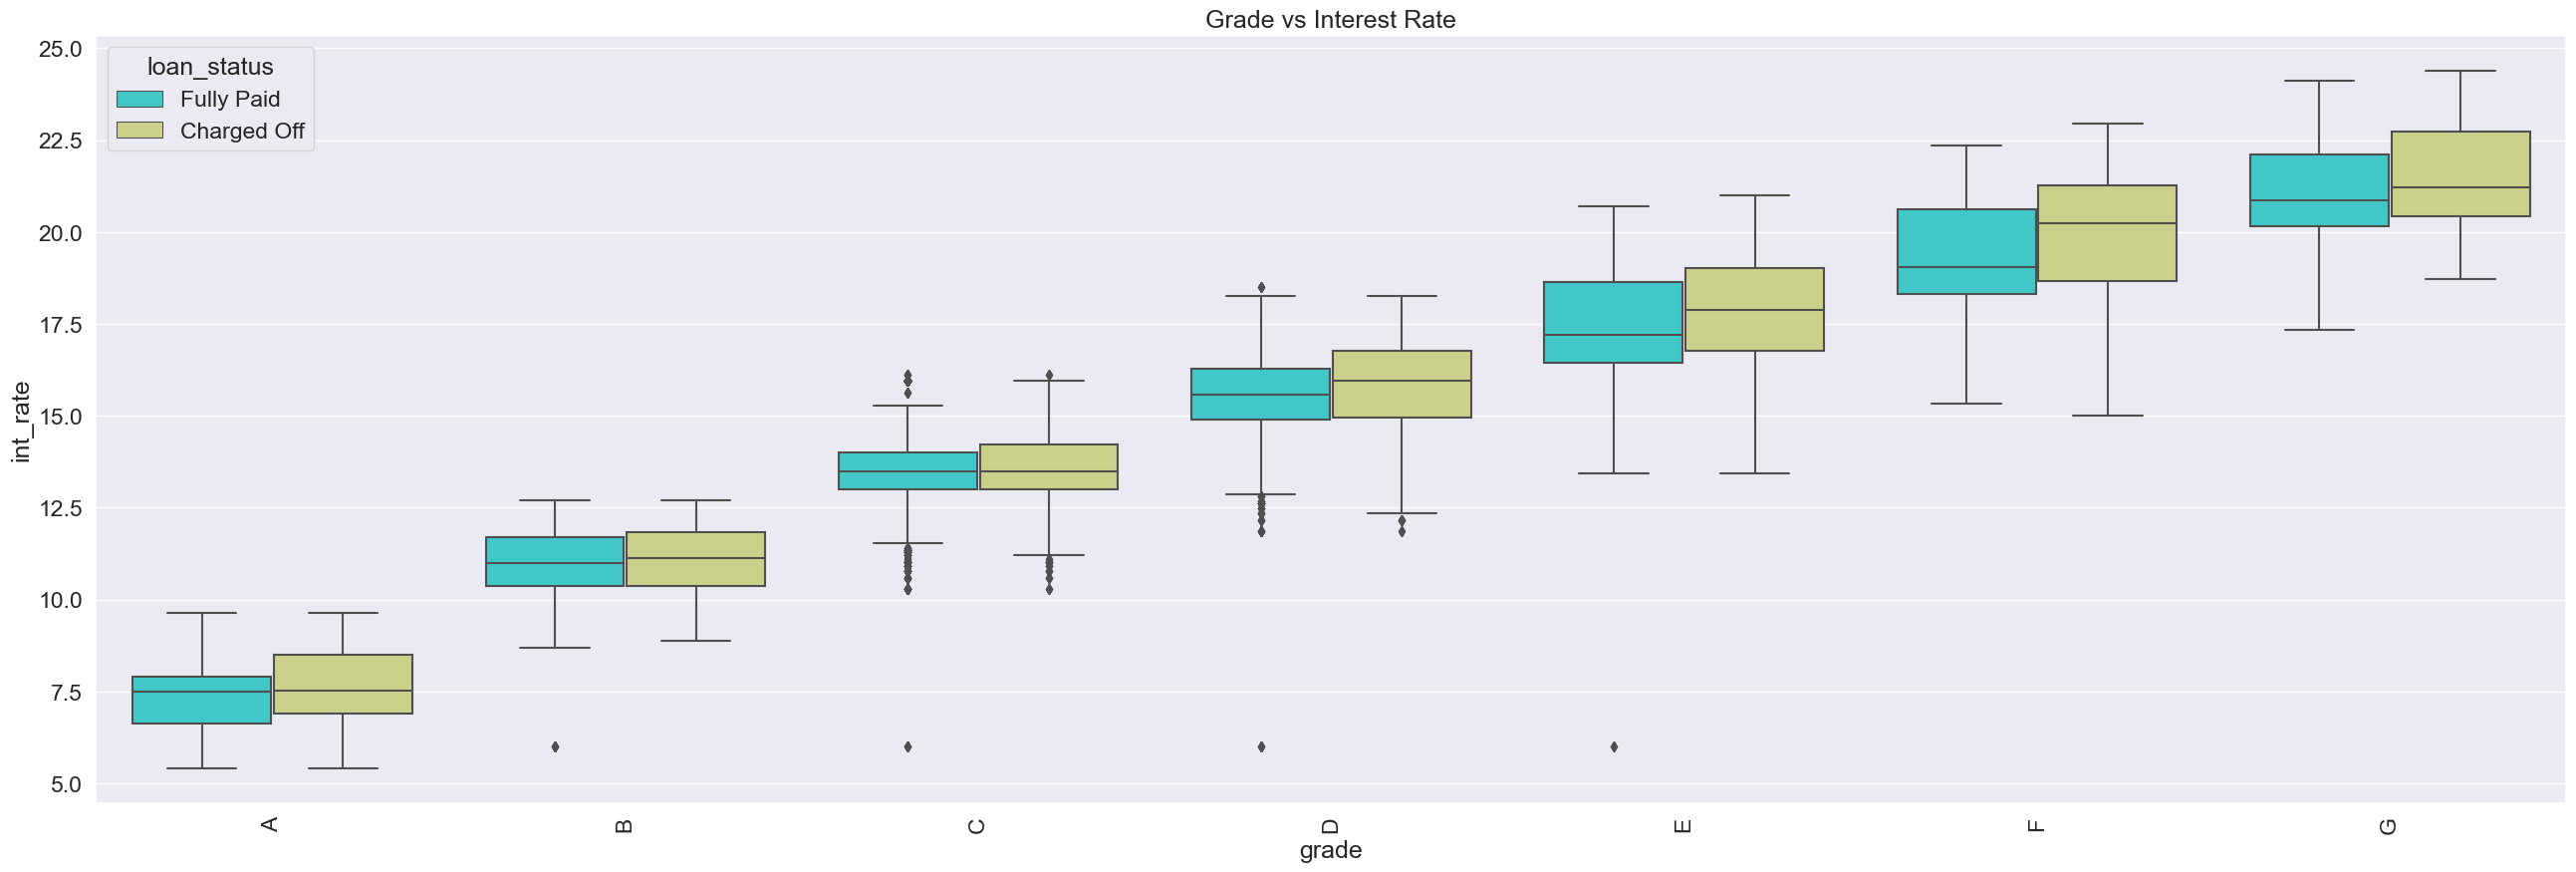

In [56]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot
bivariate_cat_num_boxplot('grade','int_rate', title="Grade vs Interest Rate",order= 'ABCDEFG')

#### Observation 
- Higher the grade of loan application , lower is the interest rate offered and the interest rate increase with increase in grades

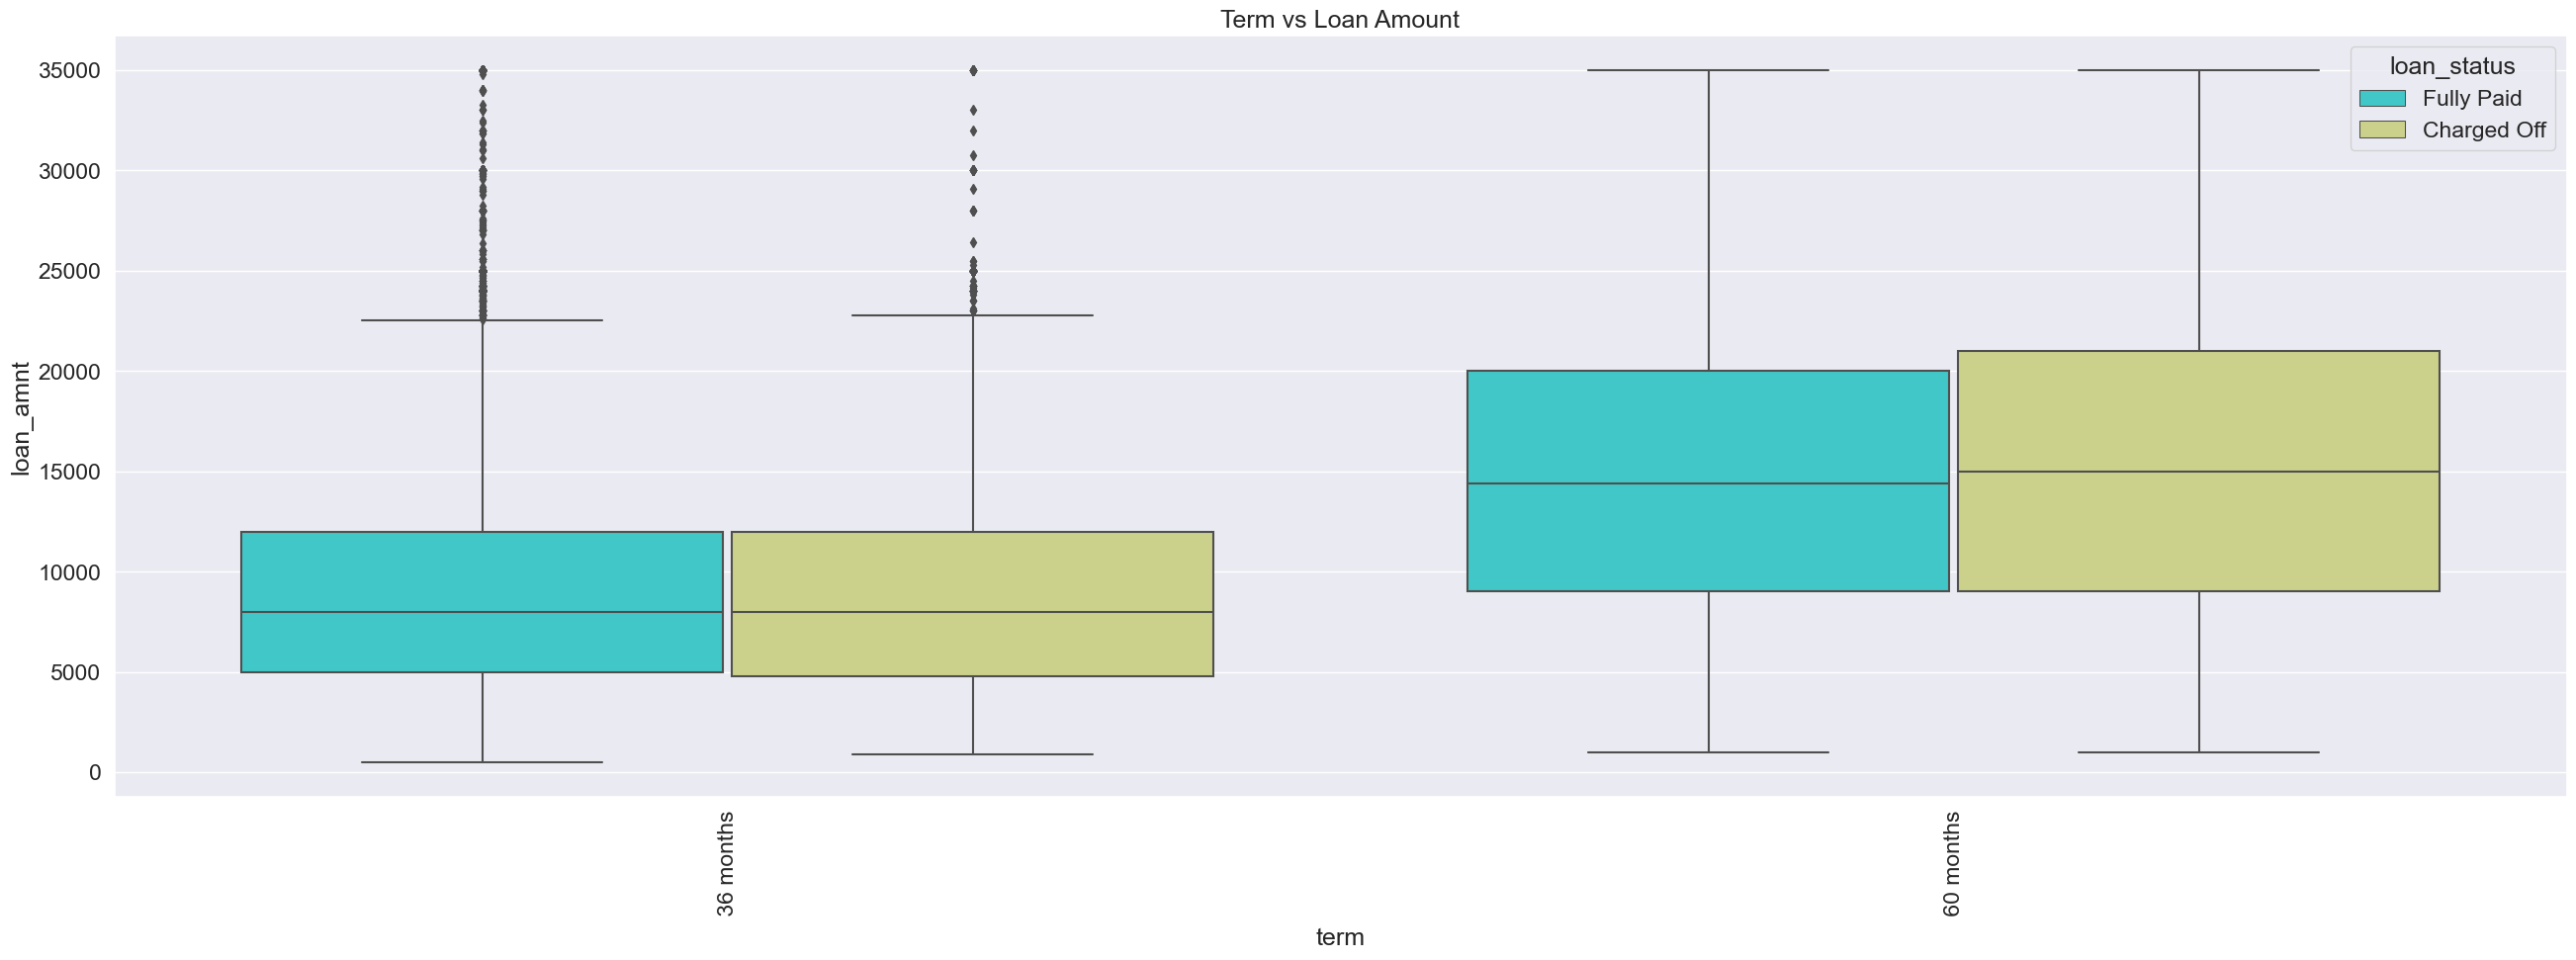

In [57]:
# Bivariate Analysis - Term vs Loan Amount
# Box Plot
bivariate_cat_num_boxplot('term','loan_amnt', title="Term vs Loan Amount")
#Observation Term increases as loan amount increases

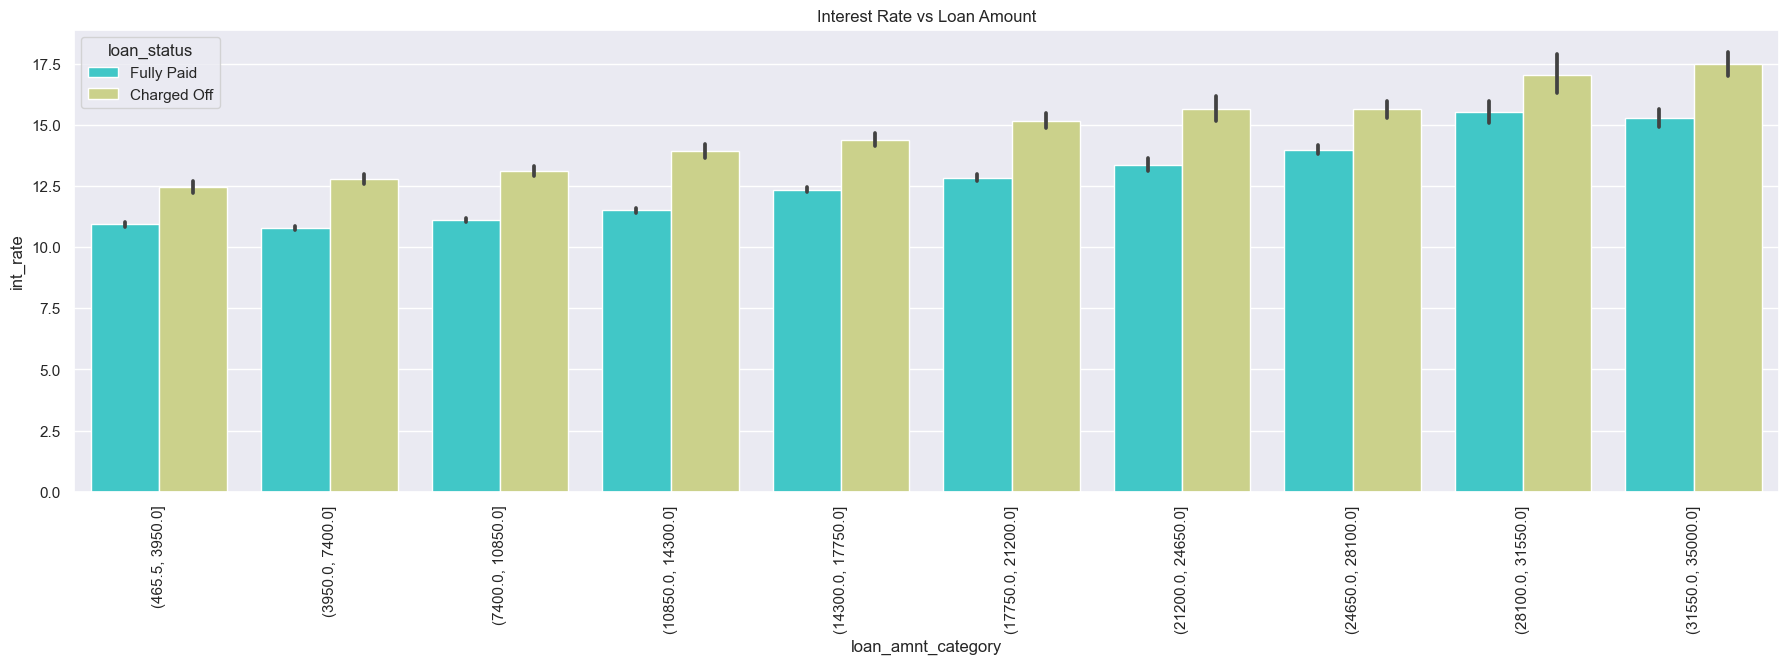

In [58]:
# Bivariate Analysis - Interest Rate vs Loan Amount
# Bar Plot
bivariate_cat_num_barplot('loan_amnt_category','int_rate', title="Interest Rate vs Loan Amount")
#Observation interest increases as loan amount increases

#### Observation 
- Higher the loan amount , higher is the interest charged and higher is the charged off percent.

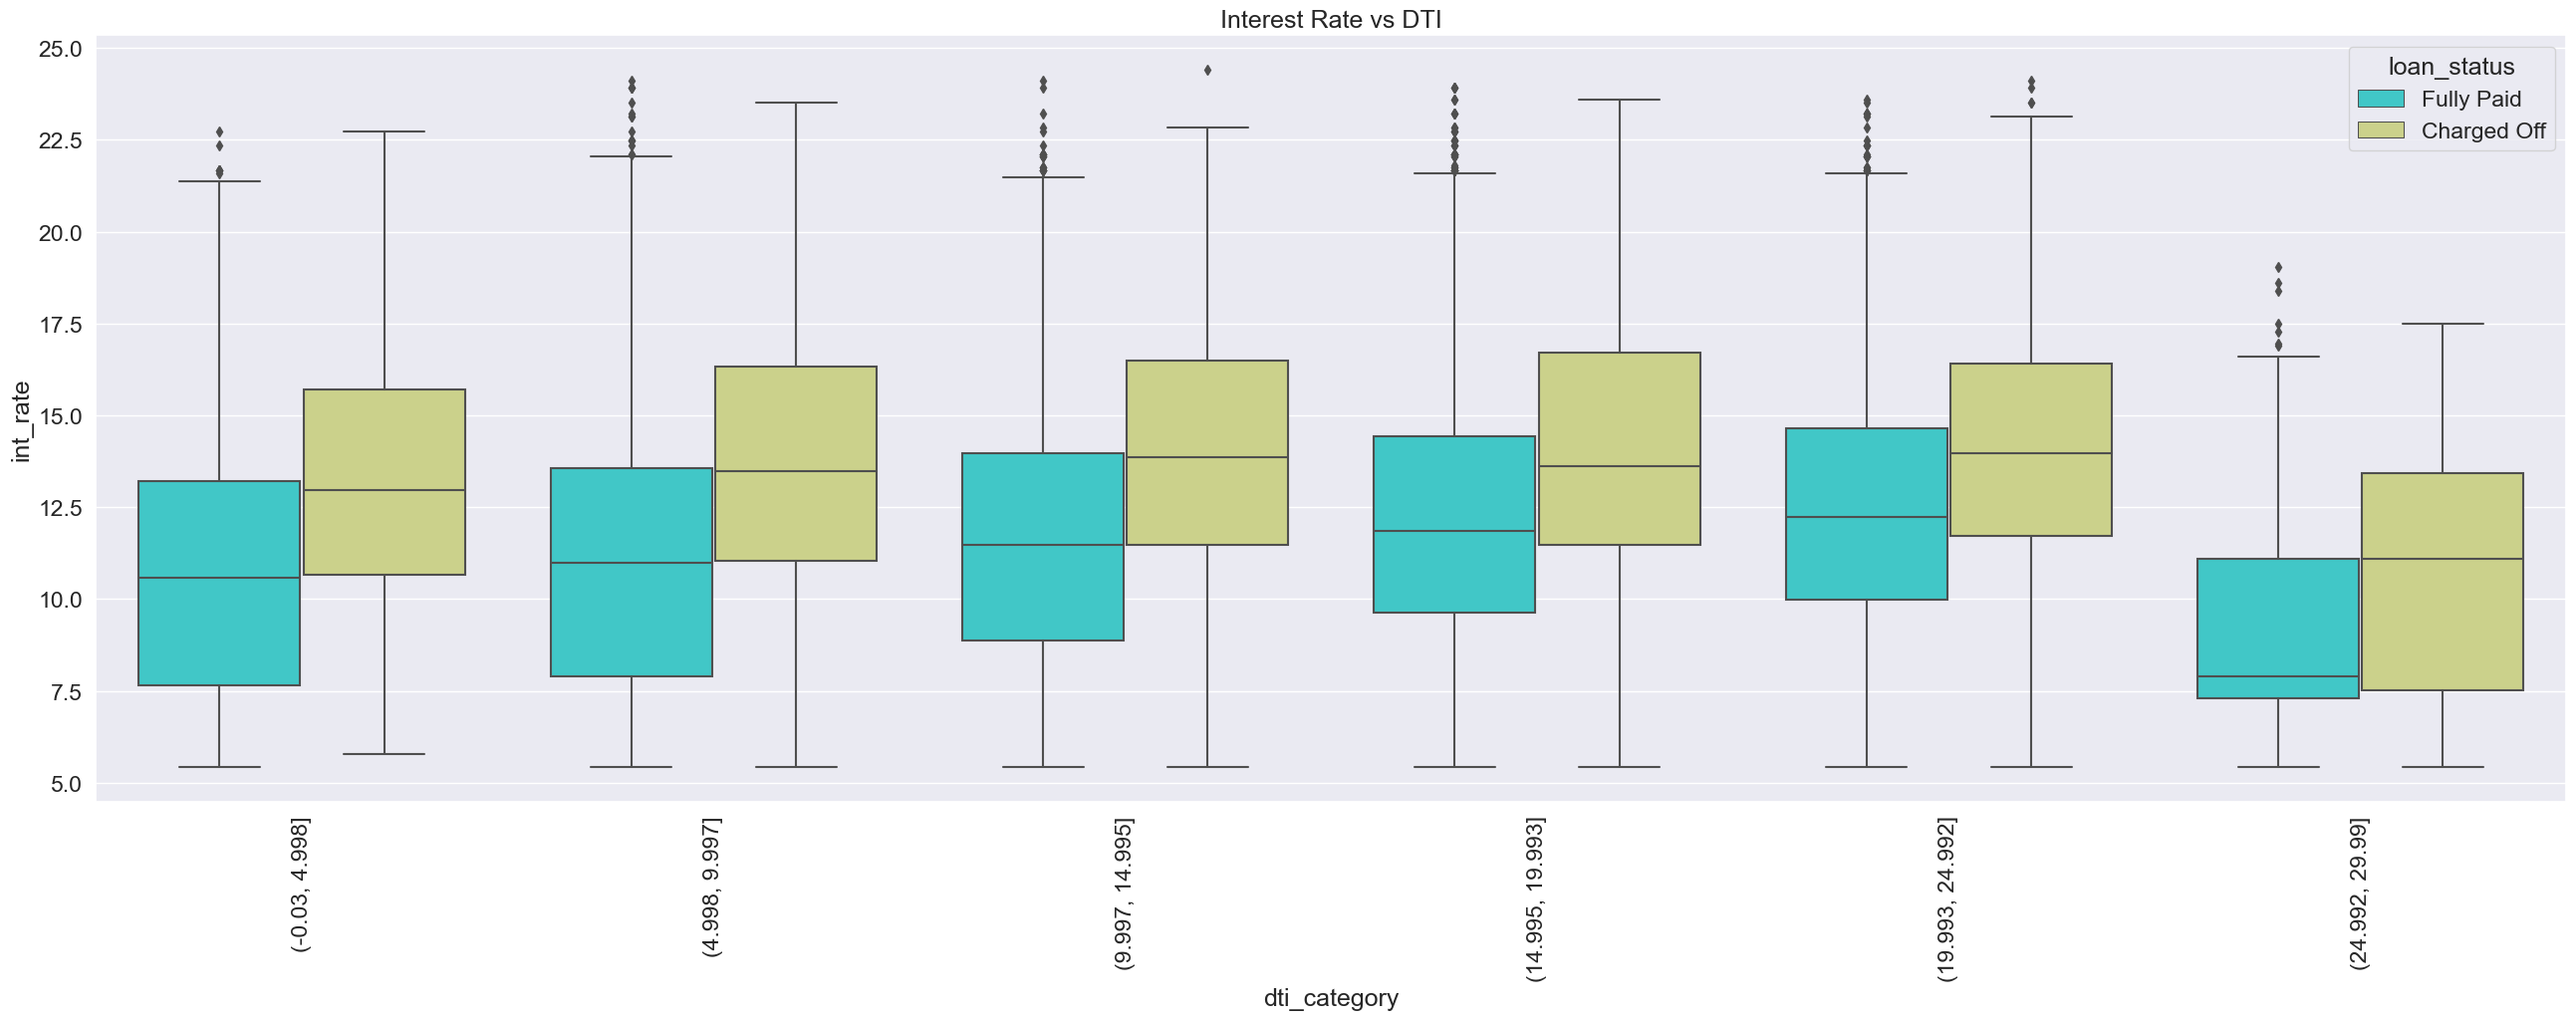

In [59]:
# Bivariate Analysis - Interest Rate vs DTI
# Box Plot
bivariate_cat_num_boxplot('dti_category','int_rate', title="Interest Rate vs DTI")
#Observation as DTI increases interest rates slightly increase

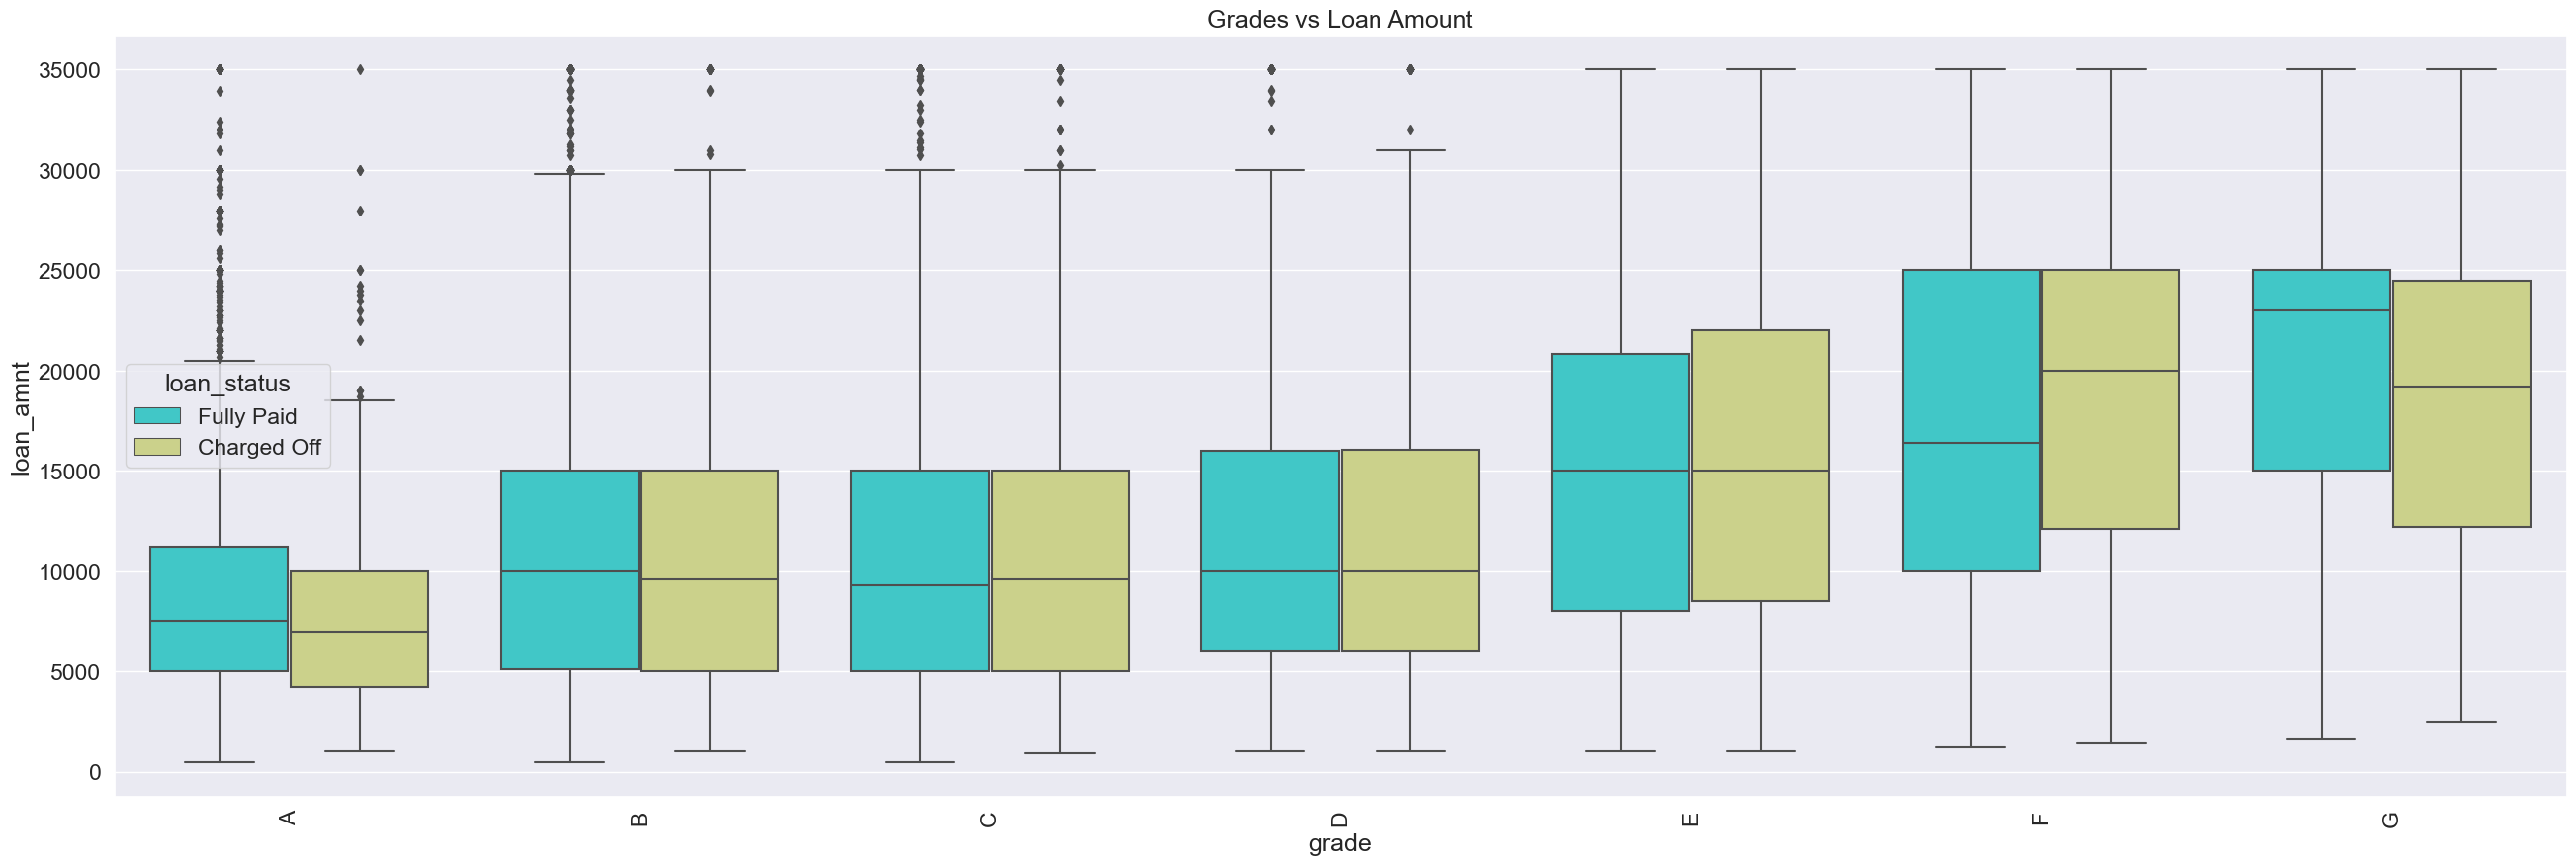

In [60]:
# Bivariate Analysis - Grades vs Loan Amount
# Box Plot
bivariate_cat_num_boxplot('grade','loan_amnt', title="Grades vs Loan Amount", order='ABCDEFG')

##### Observation 
- Larger Loan Amounts are alloted to lower Grades e.g. Median loan amounts of Grades E, F, G are much higher than A, B, C, D which also is seen from earlier plot that more defaults are seen in lower grades in loan amounts > 15K range 

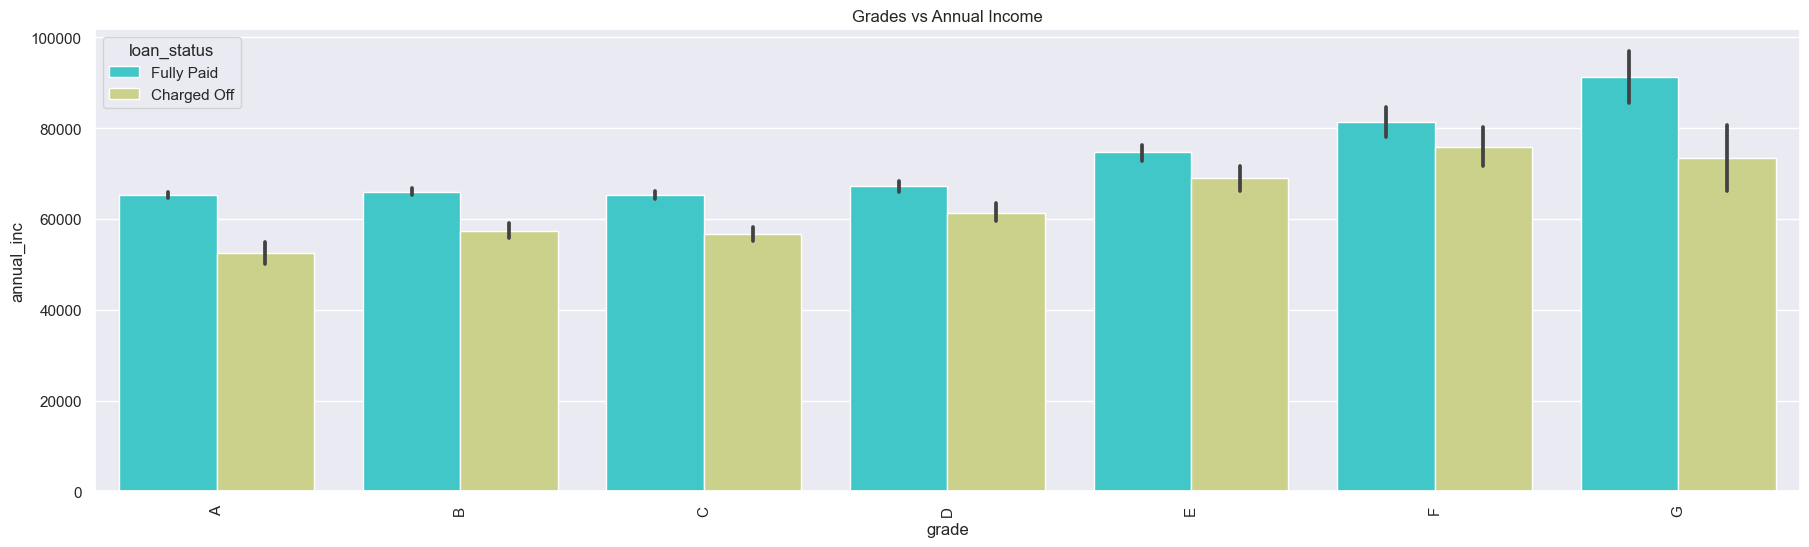

In [61]:
# Bivariate Analysis - Grades vs Annual Income
# Bar Plot
bivariate_cat_num_barplot('grade','annual_inc', title="Grades vs Annual Income", order='ABCDEFG')


##### Observation 
- From this we can clearly see that the for all the grades the applications getting charged off have less annual income than the once that have fully paid 

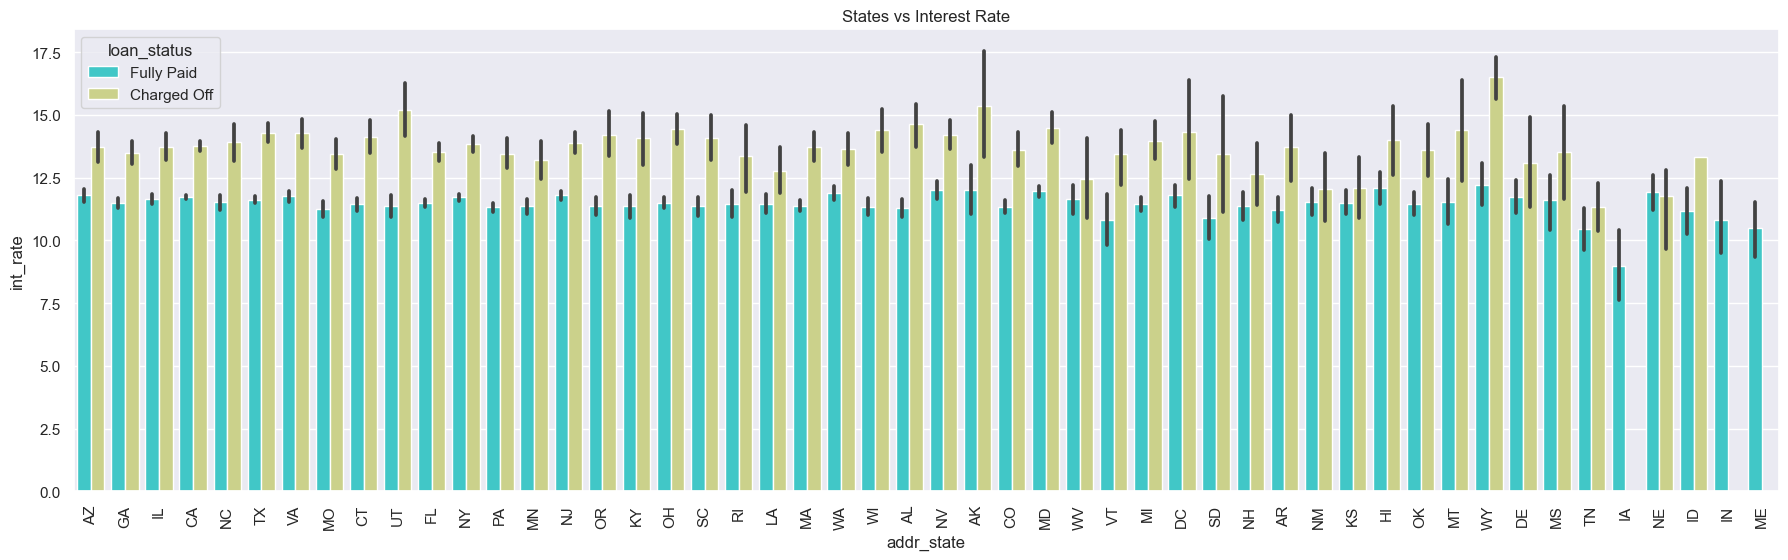

In [62]:
# Bivariate Analysis - States vs Interest Rate
# Bar Plot
bivariate_cat_num_barplot('addr_state','int_rate',title= "States vs Interest Rate")

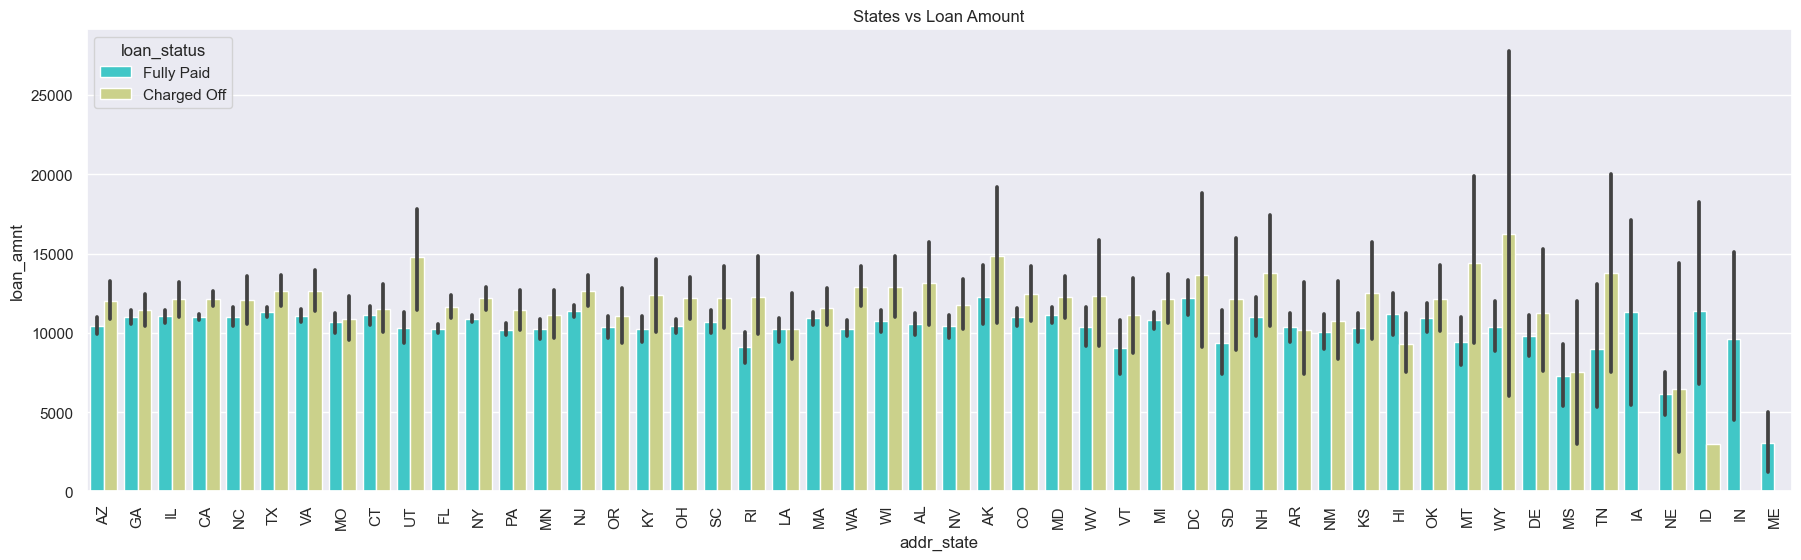

In [63]:
# Bivariate Analysis - States vs Loan Amount
# Bar Plot
bivariate_cat_num_barplot('addr_state','loan_amnt', title= "States vs Loan Amount")

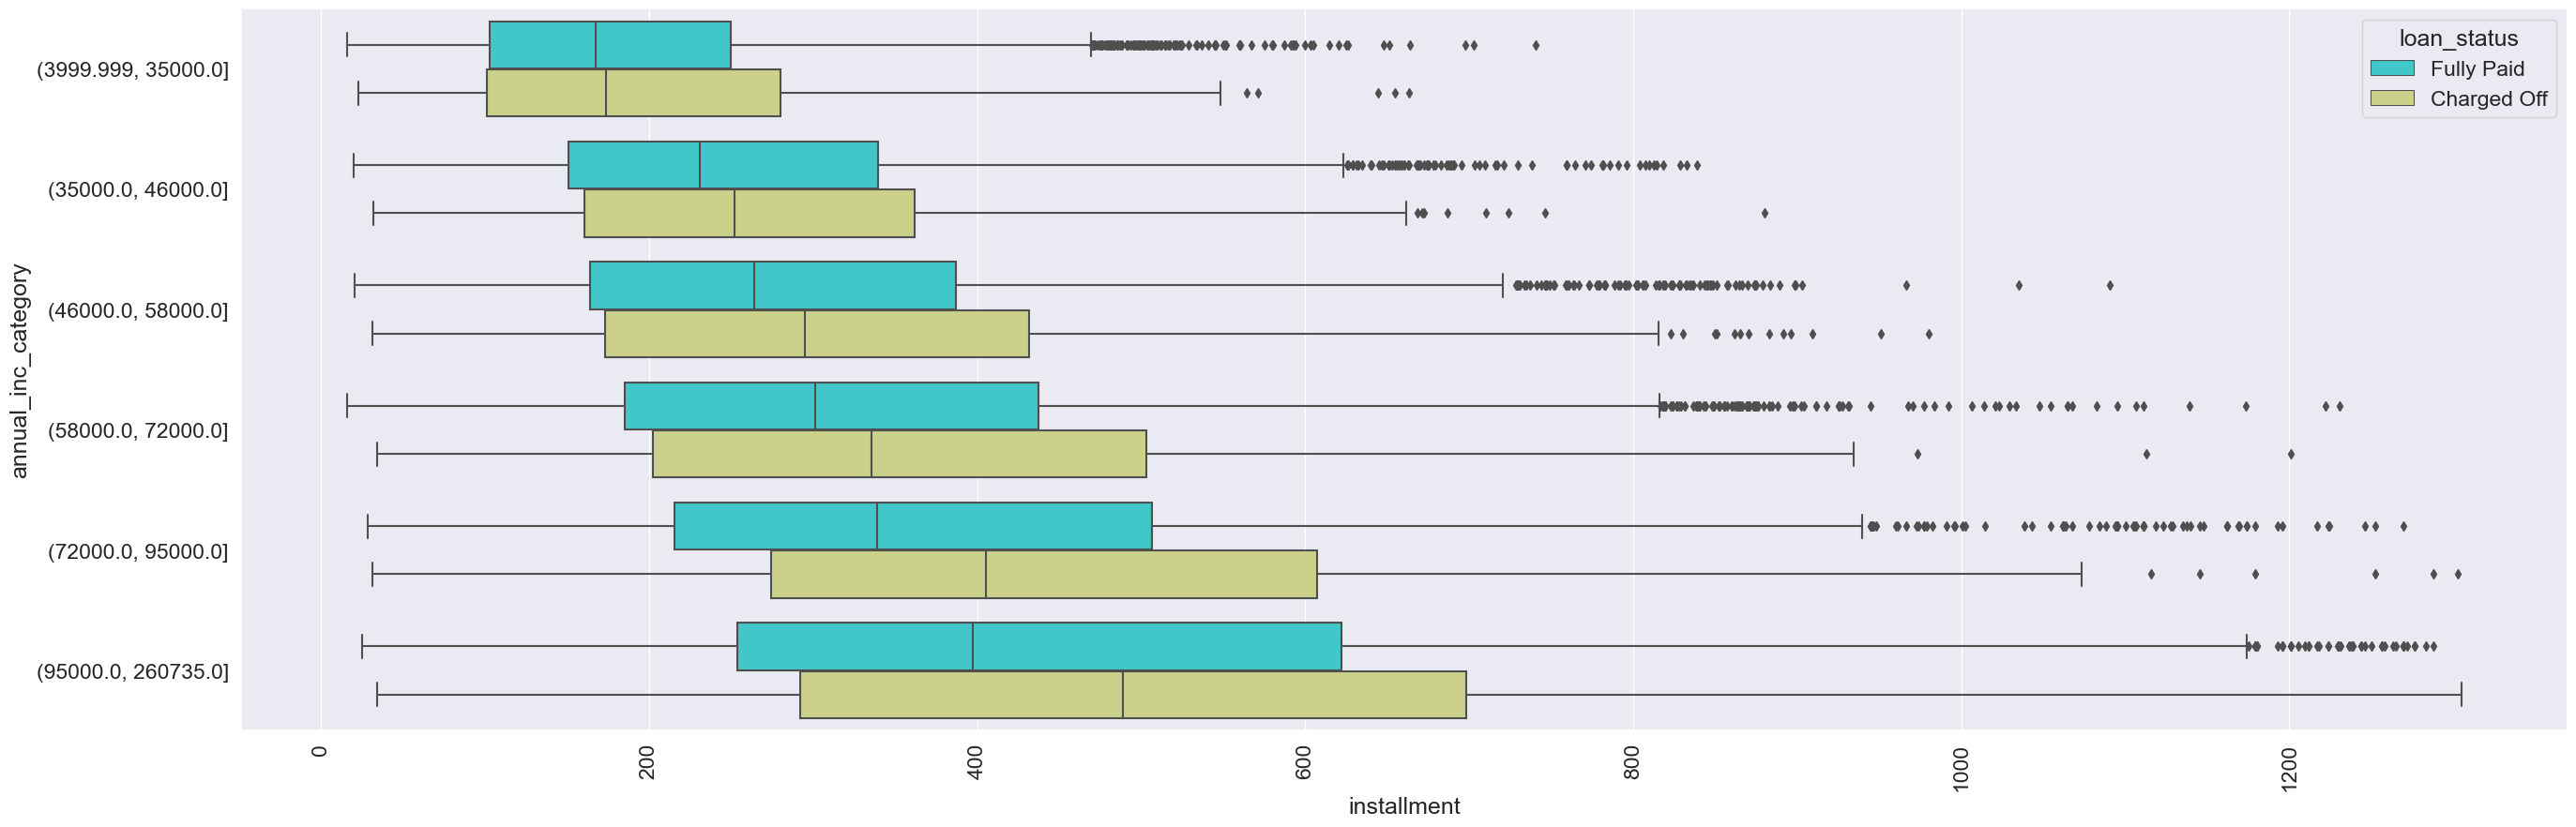

In [64]:
## Bivariate Analysis - Installment vs Annual Income
# Box Plot
bivariate_cat_num_boxplot('installment','annual_inc_category')

##### Observation 
- From above we can clearly see that for all the income category, if the installment increases then the charged off percent also increases

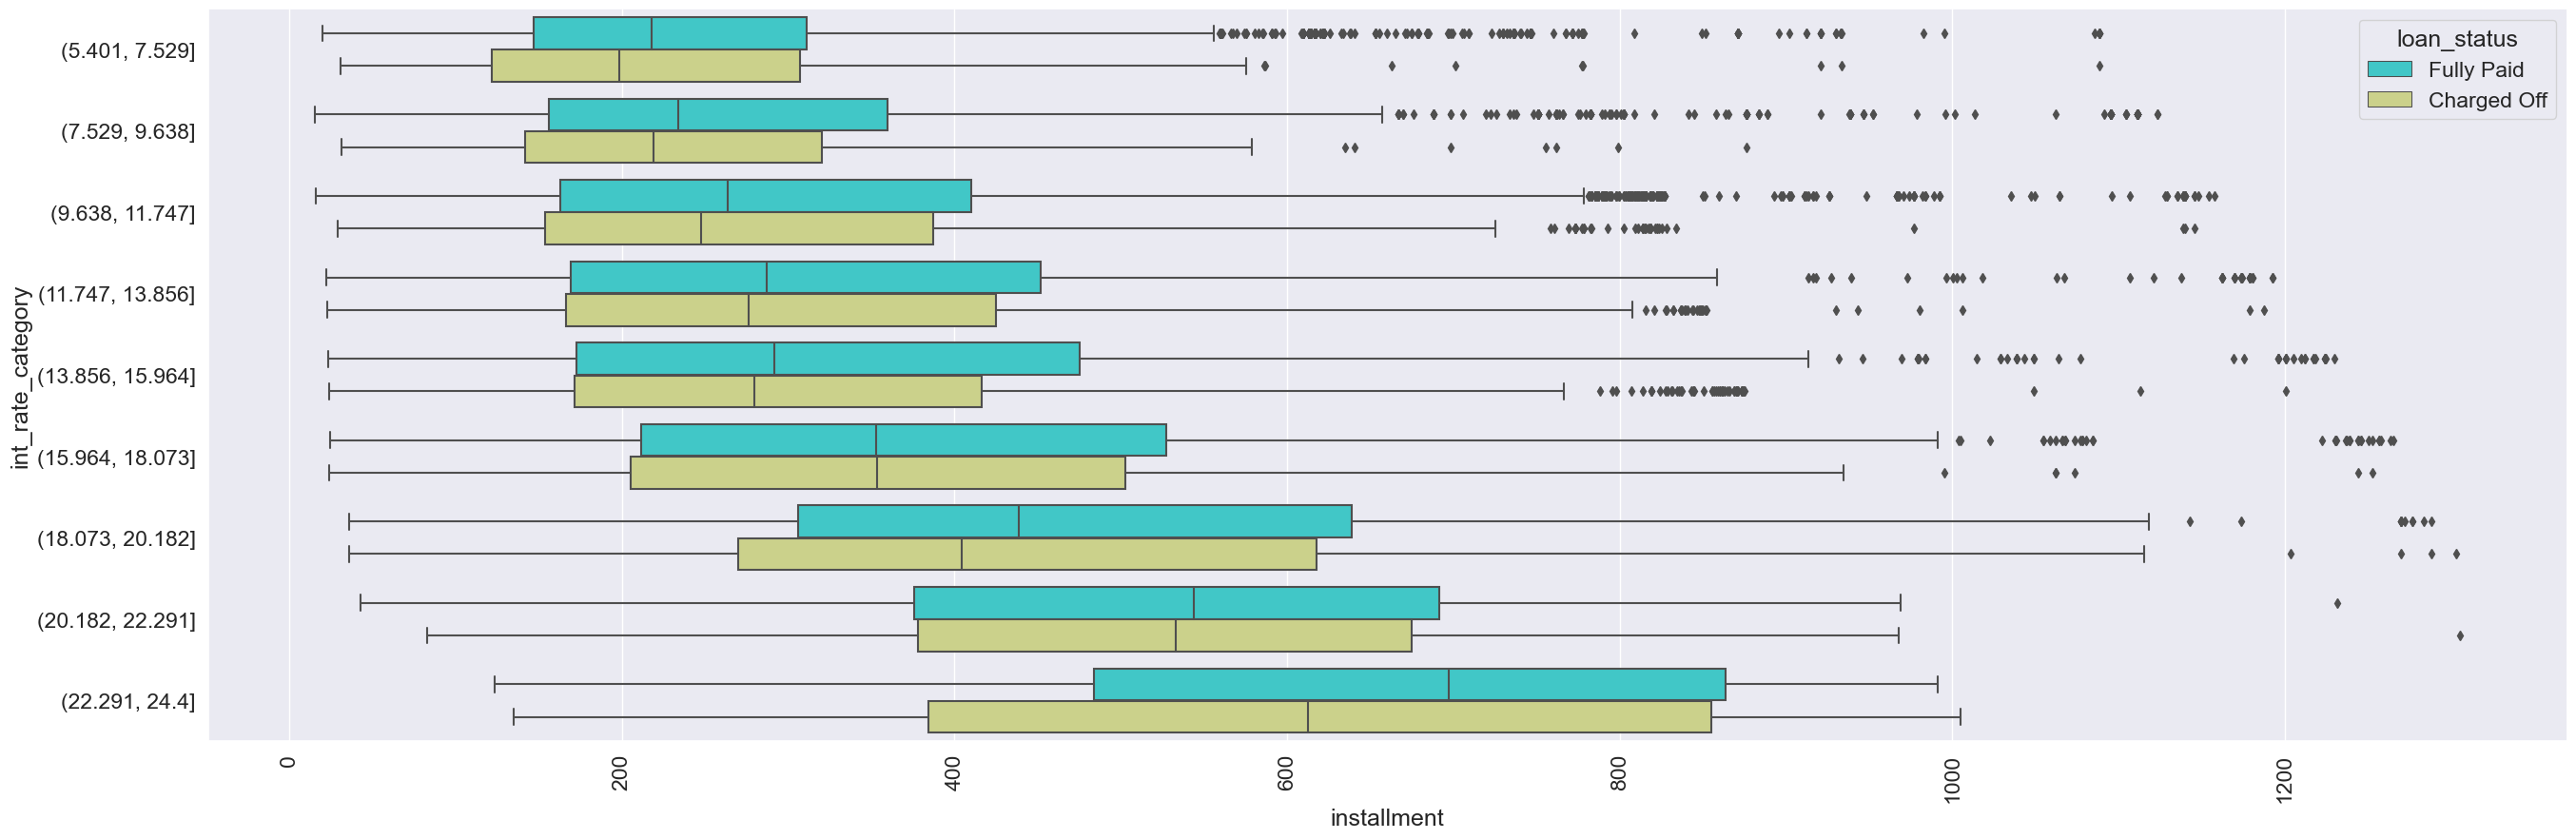

In [65]:
## Bivariate Analysis - Installment vs Interest Rates
# Box Plot
bivariate_cat_num_boxplot('installment','int_rate_category')

##### Observation 
- From above we can clearly see that as interest rates increases with the increase in installment,  then the charged off percent also increases

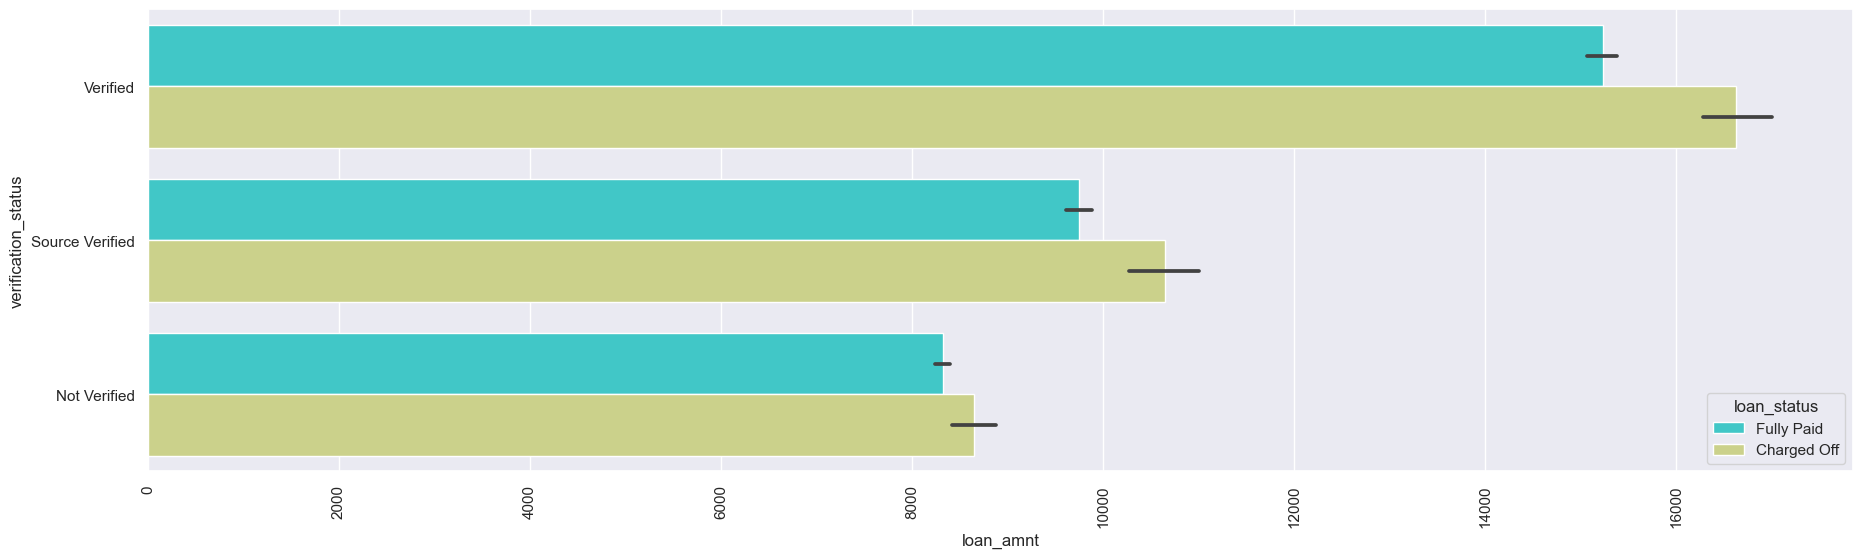

In [66]:
## Bivariate Analysis - Loan Amount vs Verification_Status
# Bar Plot
bivariate_cat_num_barplot('loan_amnt','verification_status')

##### Observation 
- From above we can clearly see that for higher loan amounts more loans are verified 

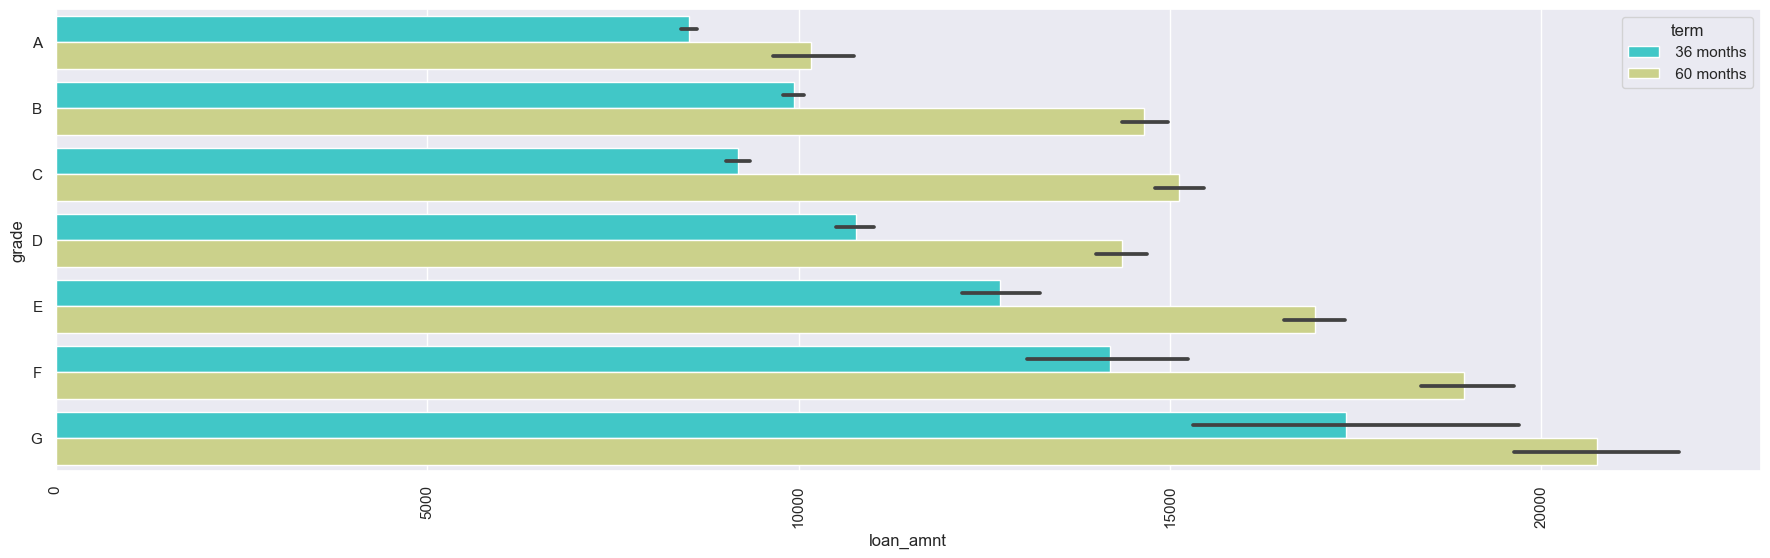

In [67]:
## Bivariate Analysis - Loan Amount vs Verification_Status
# Bar Plot
bivariate_cat_num_barplot('loan_amnt','grade', order= 'ABCDEFG', hue='term')

##### Observation 
- From above we can clearly see that for higher loan amounts are given to lower Grades for longer terms

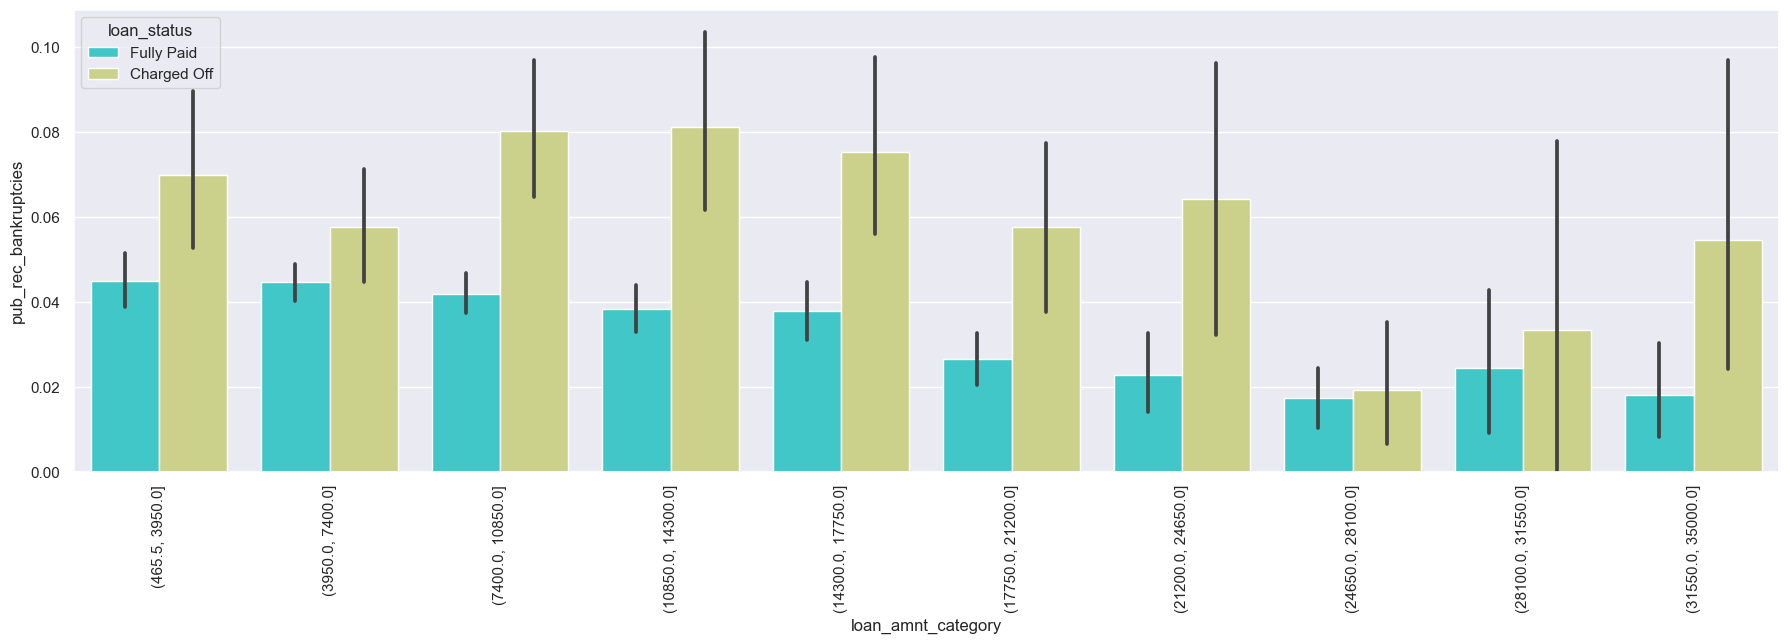

In [68]:
## Bivariate Analysis - Loan Amount vs Verification_Status
# Bar Plot
bivariate_cat_num_barplot('loan_amnt_category','pub_rec_bankruptcies')

##### Observation 
- Loan amount greater than 10K in Onwed and Other category is highly likely to get charged off
- Loan amount greater than 12K in Mortgage category is highly likely to get charged off

### Multivariate Analysis

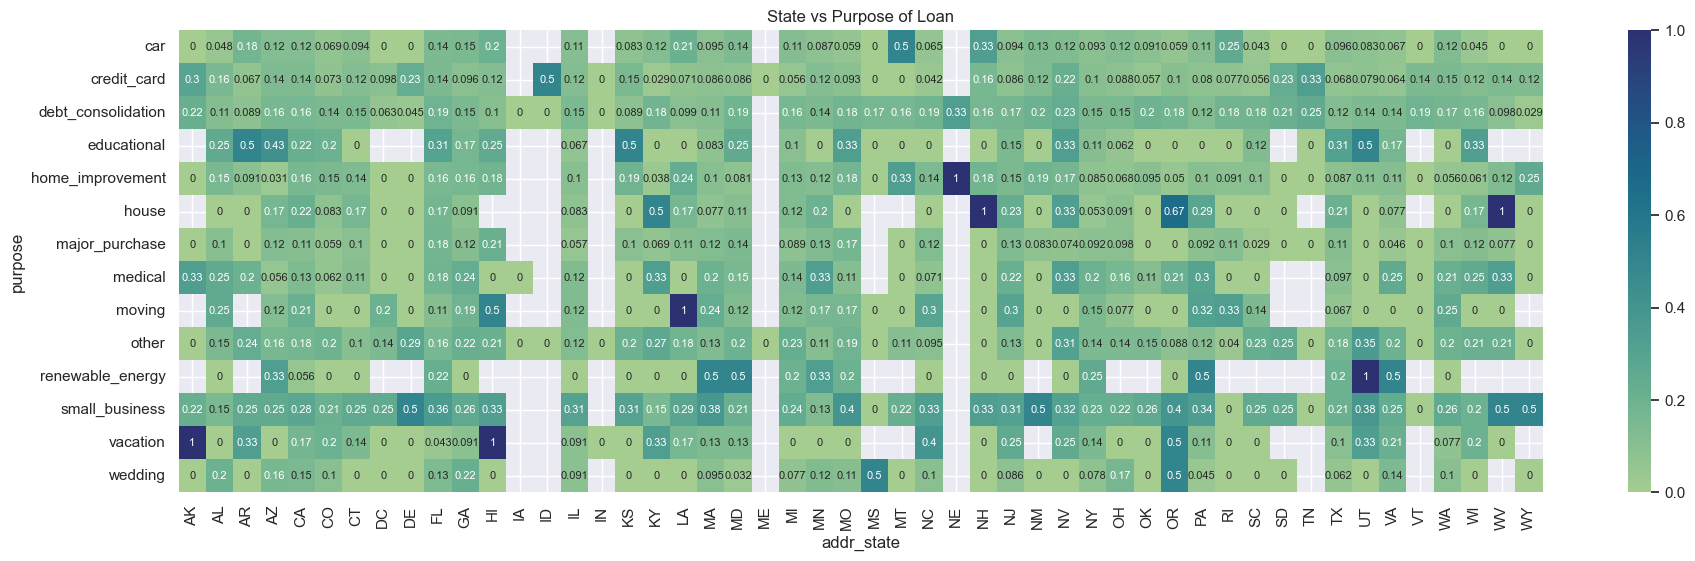

In [69]:
## Multivariate Analysis - State vs purpose of Loan impacting the loan_status
# Heatmap
bivariate_cat_heatmap(x='addr_state', y='purpose',title="State vs Purpose of Loan")

#### Observations
As per above, the loans defaulting chances for particular purpose in a particualr State are higher for below- 
- Moving Loans in LA, HI
- Small Business Loans in DE, NM, WV, WY
- Vacation Loans in AK, HI, OR, NC
- Renewable Energy Loans in MA, MD, PA, UT, VA
- House Loans in NH, WV, OR, KY
- Educational Loans in AR, KS, UT
- Wedding Loans in MS, OR

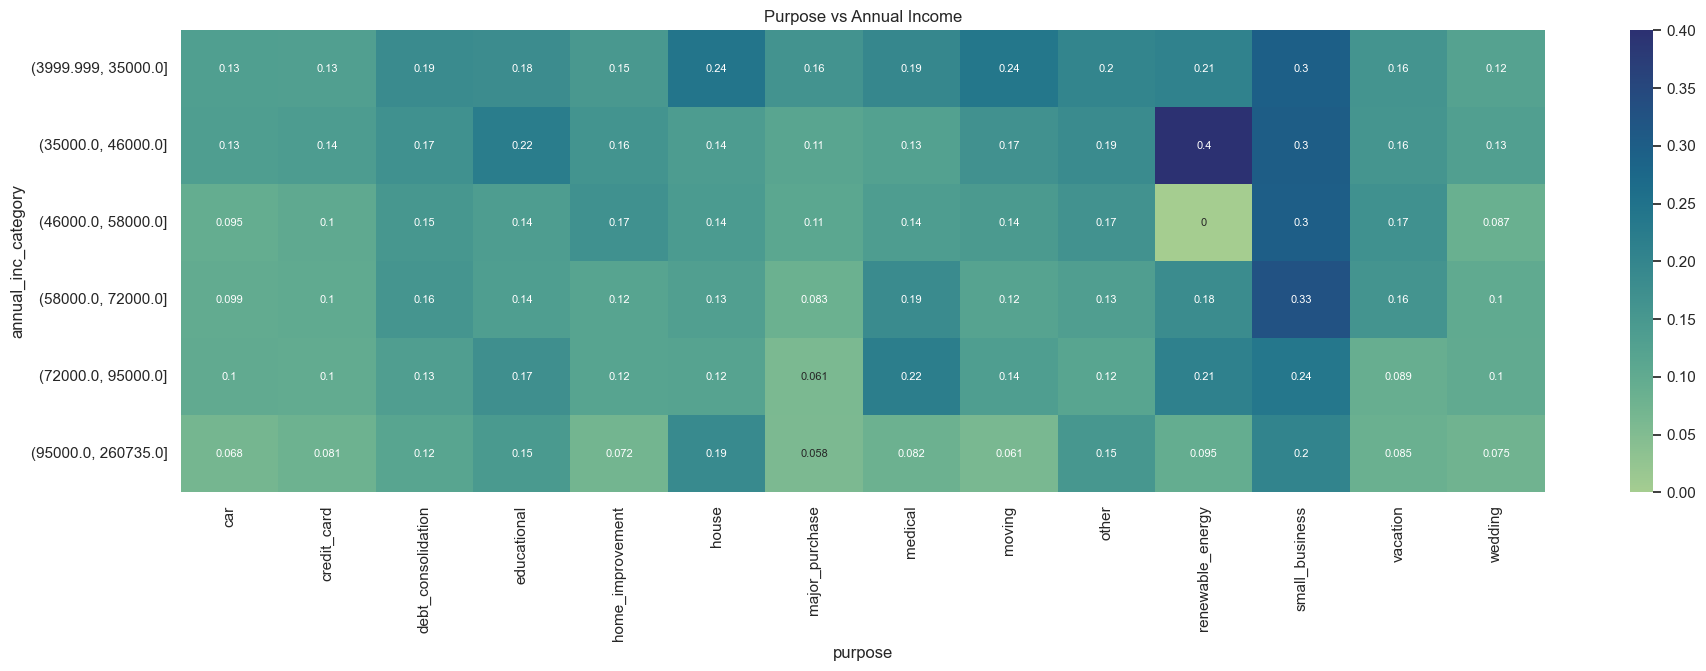

In [70]:
## Multivariate Analysis - Purpose vs Annual Income impacting the loan_status
# Heatmap
bivariate_cat_heatmap(x='purpose', y='annual_inc_category',title= "Purpose vs Annual Income")

#### Observations
As per above, the loans defaulting chances for particular purpose in a particular Income Category are higher for - 
- Medium to lowest income group for small business purpose
- Lower income group for renewable energy 

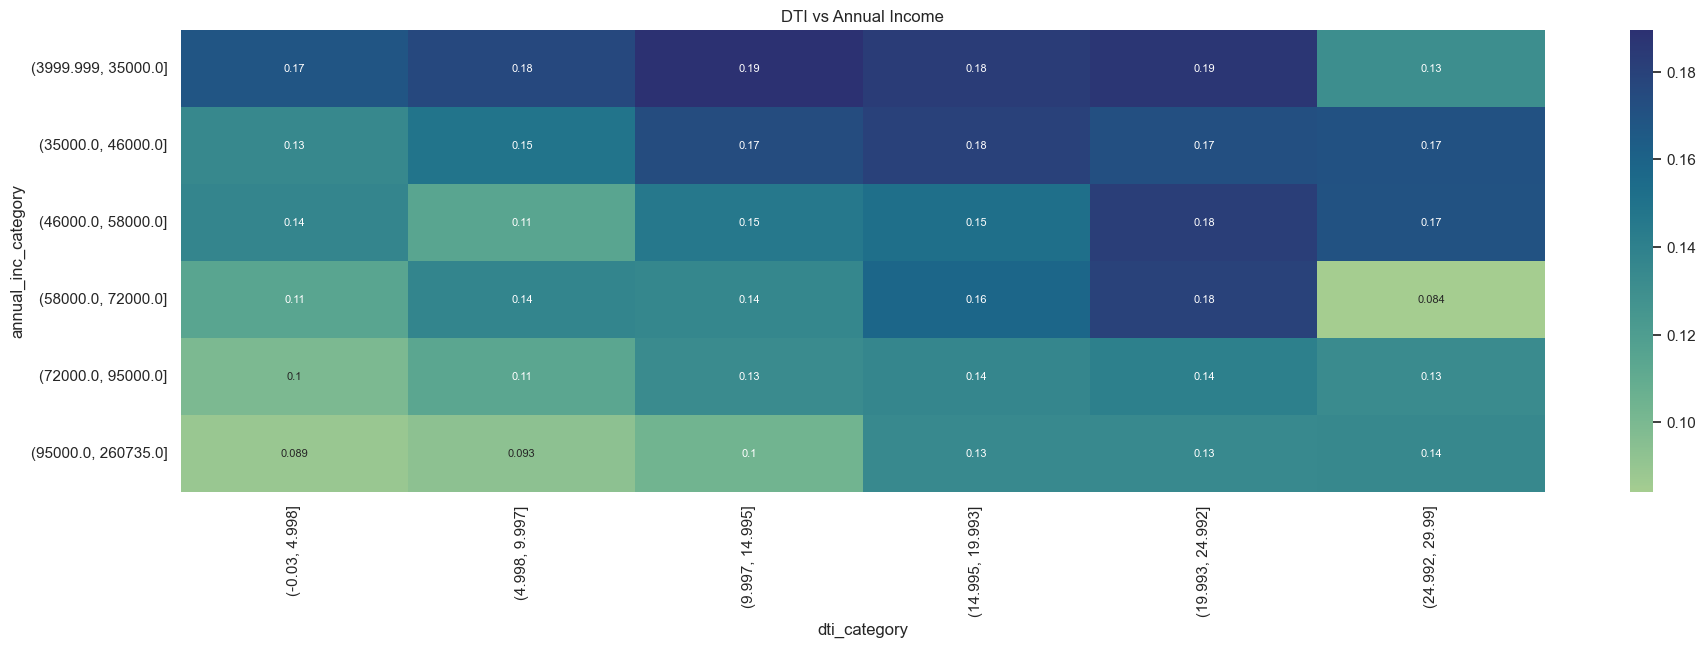

In [71]:
## Multivariate Analysis - DTI vs Annual Income impacting the loan_status
# Heatmap
bivariate_cat_heatmap(x='dti_category', y='annual_inc_category', title= 'DTI vs Annual Income')

#### Observations
As per above, the loans defaulting chances for DTI in Annual Income catagory are higher for below- 
- DTI around 15 in the low income group is likely to default in loan.

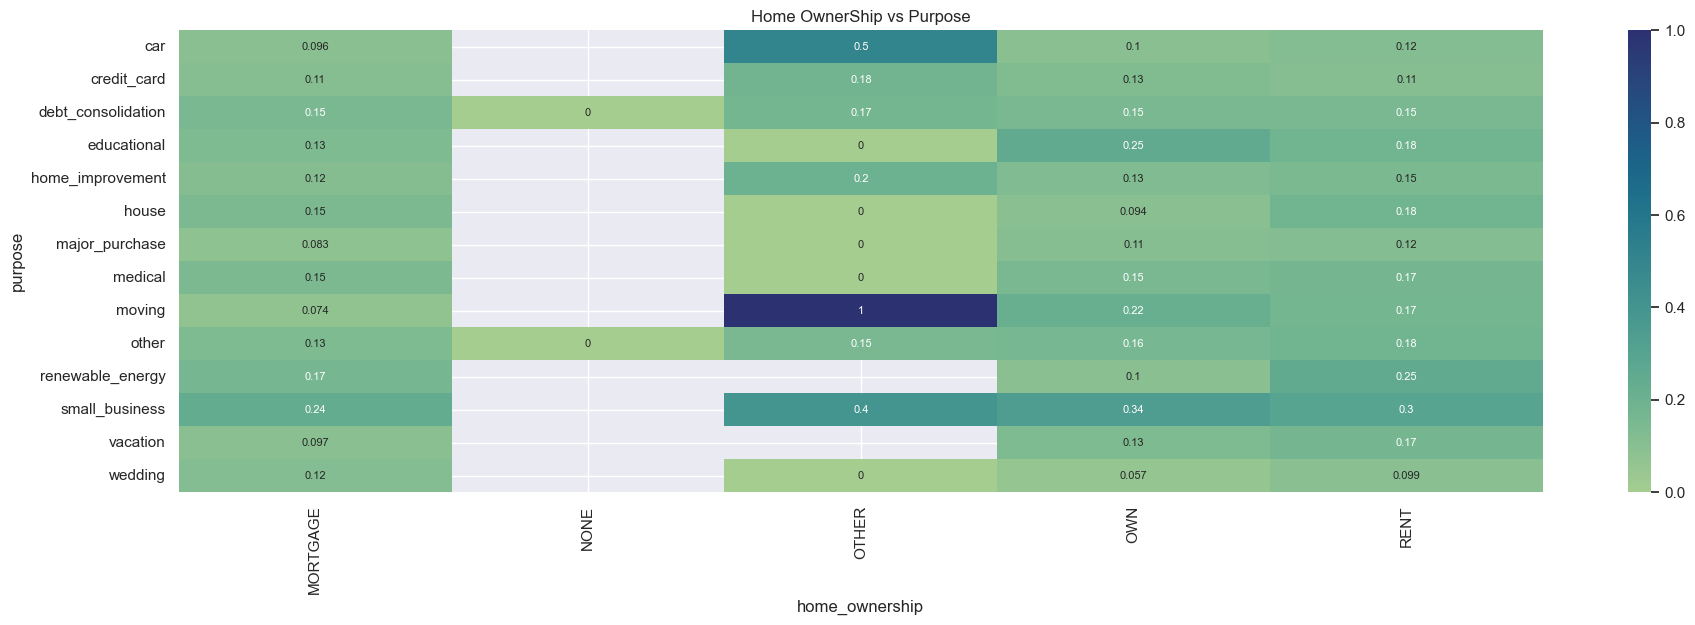

In [72]:
## Multivariate Analysis - Home OwnerShip vs Purpose impacting the loan_status
# Heatmap
bivariate_cat_heatmap(x='home_ownership', y='purpose', title= 'Home OwnerShip vs Purpose')

#### Observations
As per above, the loans defaulting chances for Home ownership in Purpose category are higher for below- 
- Home Ownership as Other for Moving, Small Business, Car. 

##### Pair Plot:

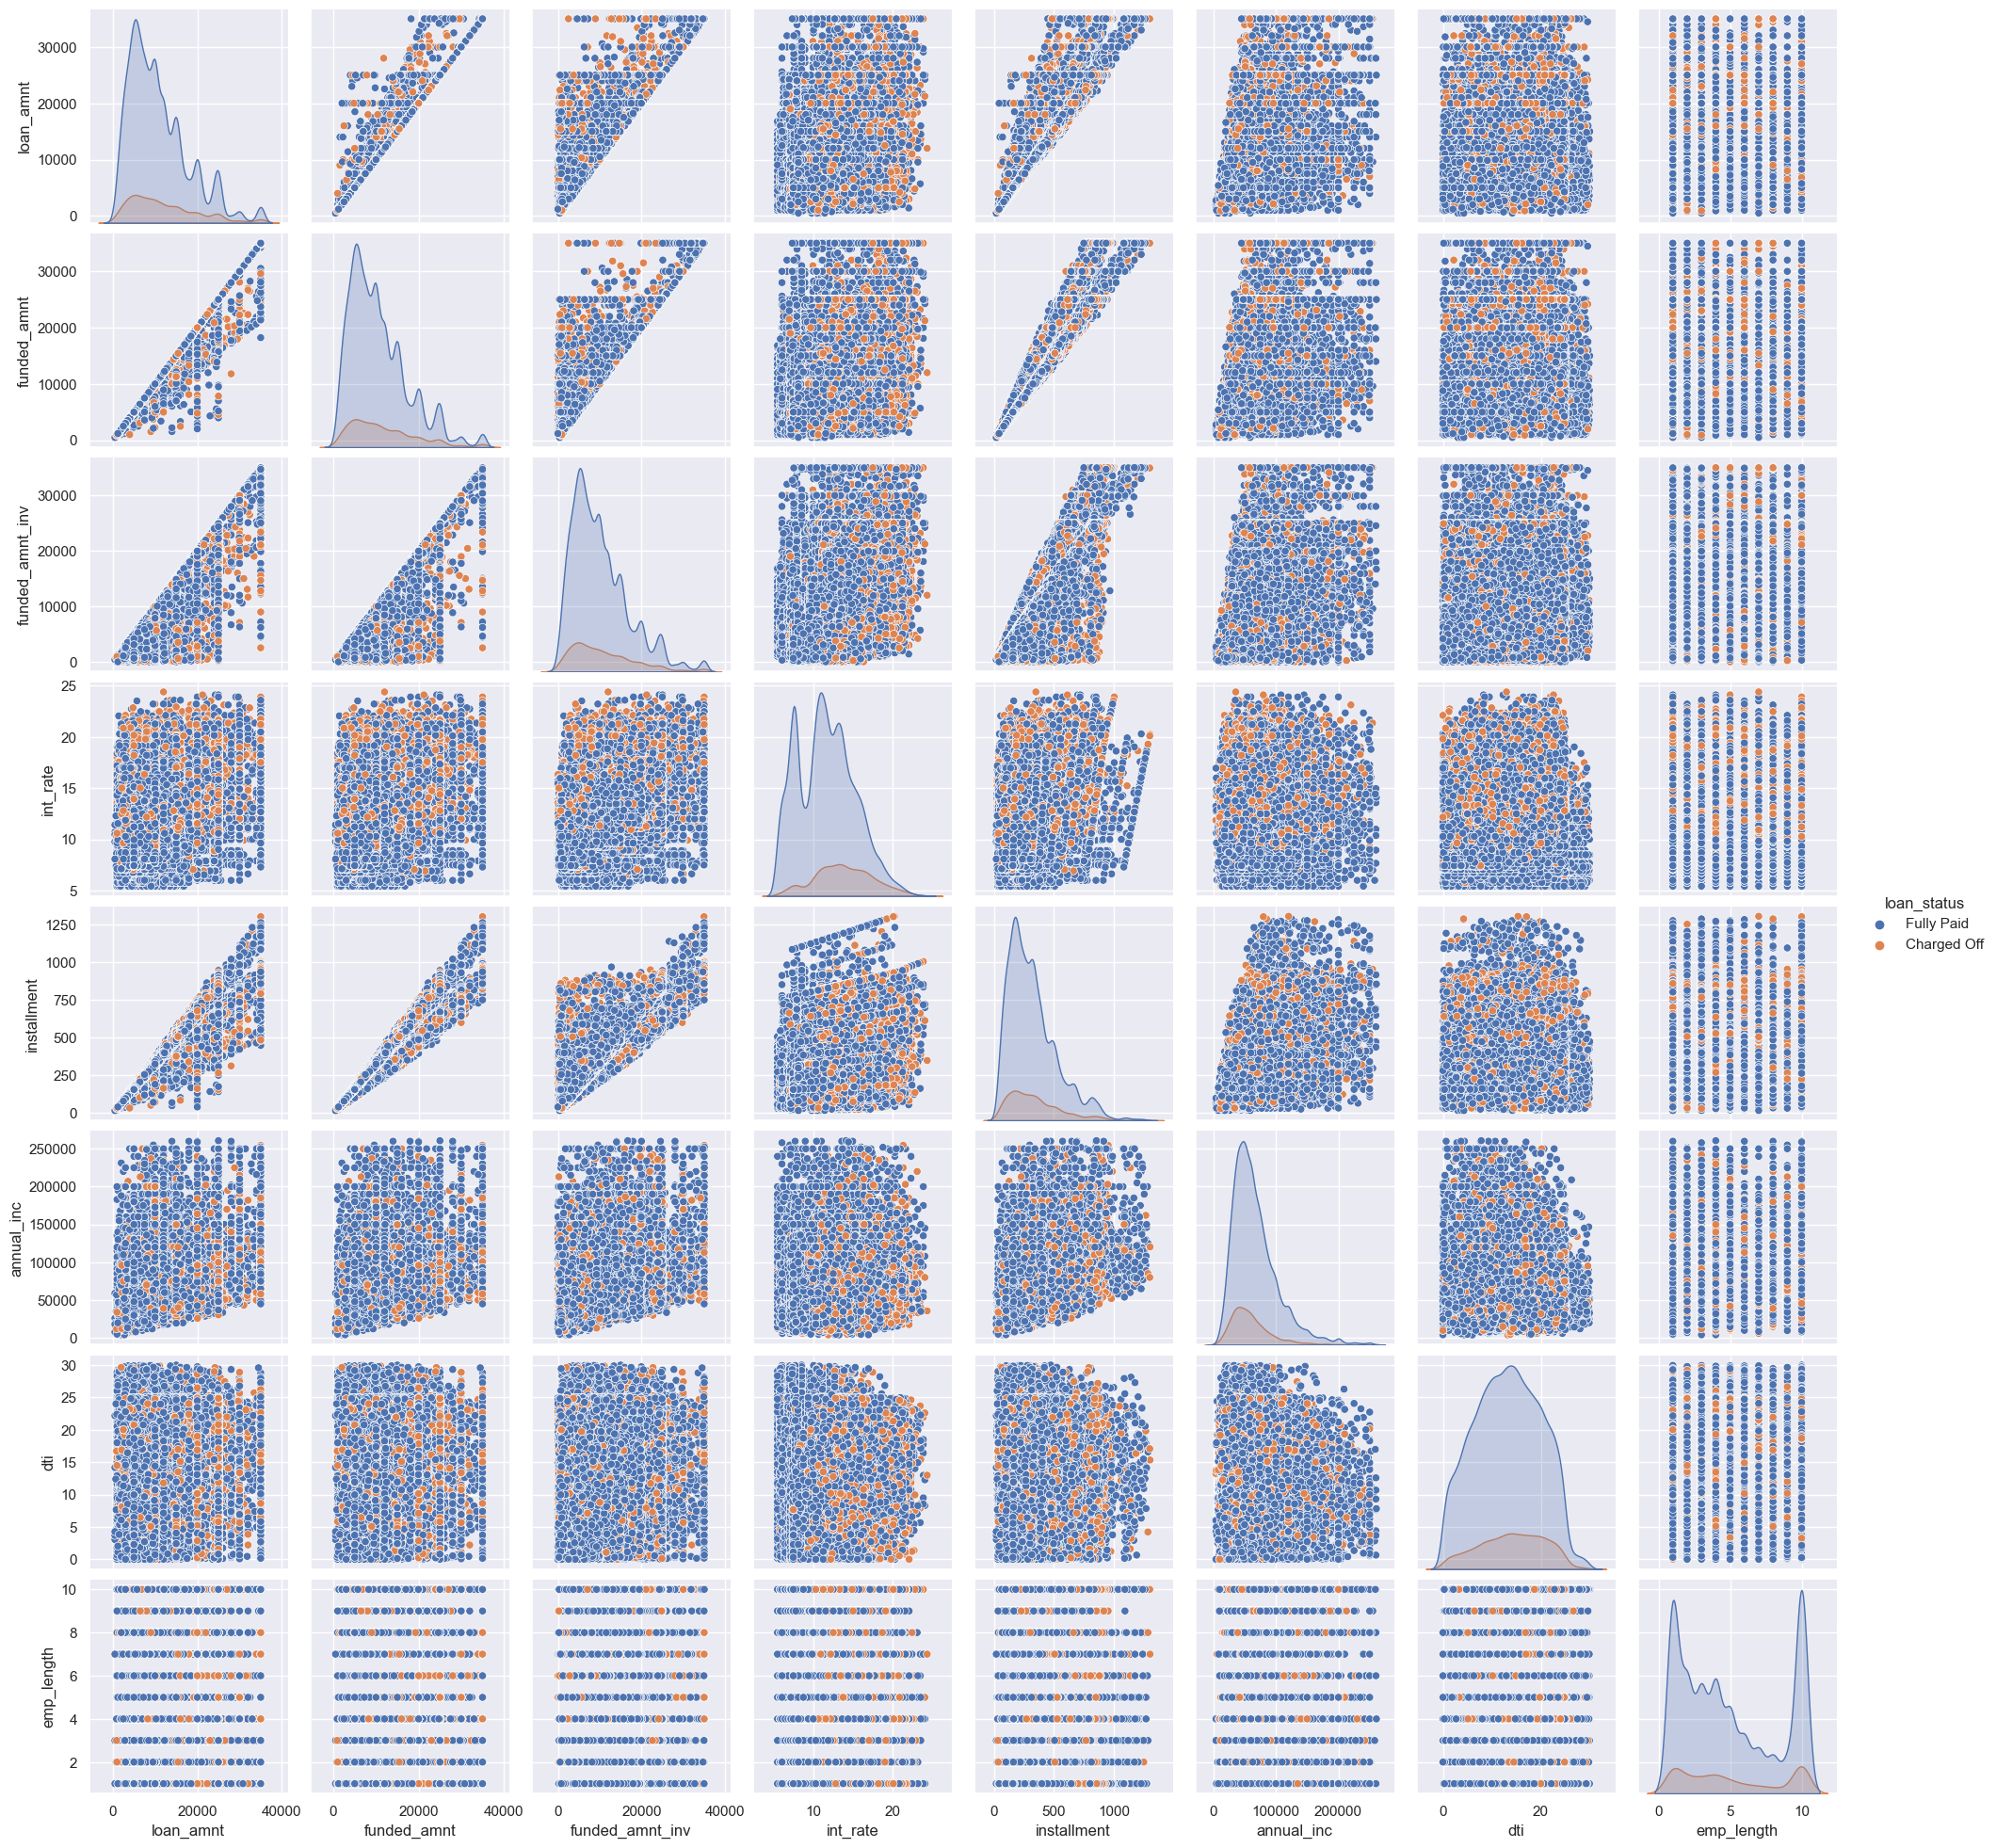

In [80]:
# Numeric to Numeric Multivariate Analysis
num_variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'emp_length', 'loan_status']
sns.pairplot(data=loan_df[num_variables],hue="loan_status")


##### Key Observations- 
- Lower Interest Rates with with lower Annual Incomes have lower Charged Off loan status 
- Lower DTI with lower interest rates have lower charged off Loan Status 
- Installments increase with increase in Loan Amount and number of Charged off as are less in high installments 
- Lower Annual Income with High Interest Rates lead to higher defaults

##### Correlation Matrix :

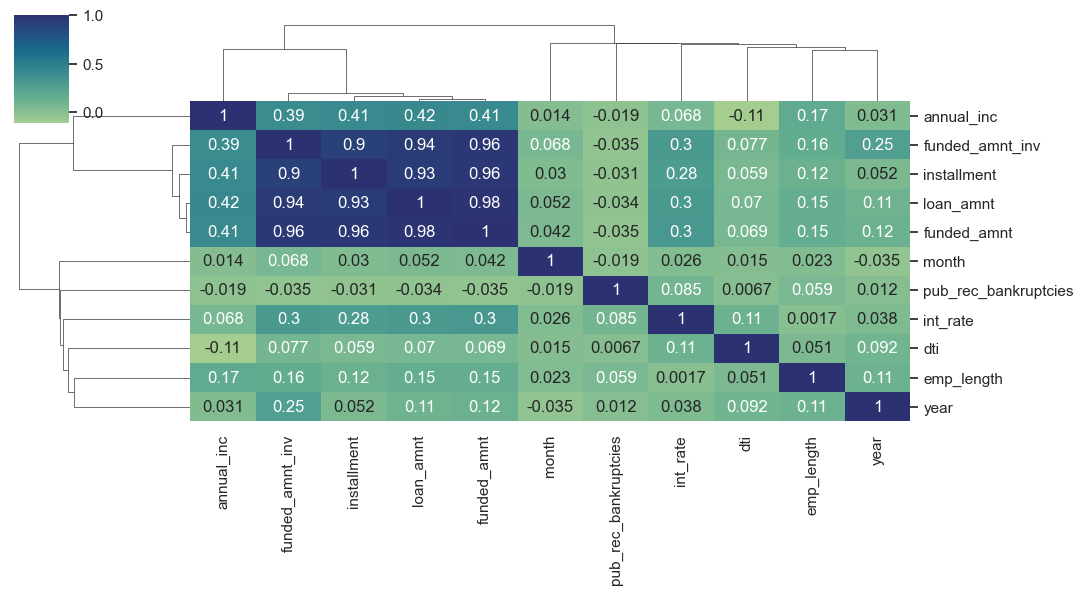

In [81]:
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
loan_corr = loan_df[numerical_columns].corr()
sns.set(font_scale=1.0)
sns.clustermap(loan_corr,annot=True,figsize=(11, 6),cmap="crest")
plt.show()

#### Observations -
- Loan Amount , Amount Funding, Investor Amount Funding , Installments are **highly correleated**
- DTI is **negatively correlated** to Annual Income , which makes sense as since lower the salary more is the ration of salary going towards debt payment
- Correlation shown in general are not very strong for other columns. and in general very few correlations are greater than 60%

### Observations 
- Major Factors that have Impact on Charged Off are
    - Interest Rates
    - Grades and Sub Grades of loan applications
    - Public Bankruptcy Records
    - Loan Purpose
    - Loan Amount
    - Installment Amounts
    - Annual Income
    - DTI ratio
    - State of applicant
    - Month of issue


### Conclusions
- **High interest rates above 12.5% have higher chances of default**.
- **Public Bankruptcy 1 and 2** have high chances of default.
- **Loans graded as E, F, or G, and their respective subgrades**, have a higher default rate.
- **Loans with a term of 60 months carry a higher risk of default**; when combined with interest rates, the risk is also higher for 36-month term loans.
- Loan applications for **purposes such as Small Business, Renewable Energy, and Education have a high risk** of being charged off.
- **Loan amounts exceeding 15,000** have a higher chance of default.
- **Installment amounts above 300** pose more risk.
- **Higher Debt-to-Income (DTI) ratios above 15% indicate a higher risk** of default.

### Recommendations
- Better to **reduce the interest rates for small businesses** to reduce the default rates less than 12%.
- Based on the analysis the loan company **should expand on various states apart from NY and CA only which have earning potential** or more equivalent to these states.
- Should **target employment length groups more between 3- 9 years by providing lower interest for purposes like home ownership**.
- **Risky purposes such as vacation ,moving  etc the rate of interest should be increased as the risk of default exposure will be covered**. If not to avoid certain states with certain purposes which have a high default record should be avoided.
- **Lending less than 10K** which mitigate the risk of default.
- **Should avoid giving low income group high amount of loans above 10k especially states having low income.**